# Train and test the model

In [1]:
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import load_model
from keras import optimizers
from keras.callbacks import EarlyStopping
from tqdm import tqdm

# functions from other notebooks
import sys
sys.path.insert(0, '../functions')
from ipynb.fs.full.models import classifier
# from ipynb.fs.full.generate_data import convert, visualize

Using TensorFlow backend.


# Data

In [2]:
# load data
f_path = 'c_data_3B.h5'
X = pd.read_hdf(f_path, 'X')
y = pd.read_hdf(f_path, 'y')

In [4]:
# Data preprocessing

# uniformly scale data
X_scaled=X*(10**22)

# Train test split with sklearn
Xtrain,Xtest,ytrain,ytest = train_test_split(X_scaled.values,y.values,test_size=0.1,random_state=13)

# save test set
f_path = 'c_testdata_3B.h5'
X_test_df = pd.DataFrame(Xtest)
y_test_df = pd.DataFrame(ytest)
X_test_df.to_hdf(f_path, key='X', mode='w')
y_test_df.to_hdf(f_path, key='y')

/Users/DRRRR/anaconda/envs/machinelearning/lib/python3.6/site-packages/pandas/core/generic.py:1299: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->floating,key->block0_values] [items->[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 1

In [5]:
# Reshape data
X_train = []
for i in np.arange(len(Xtrain)):
    h = Xtrain[i].reshape(4096,1)
    X_train.append(h)
X_train = np.asarray(X_train)

X_test = []
for i in np.arange(len(Xtest)):
    h = Xtest[i].reshape(4096,1)
    X_test.append(h)
X_test = np.asarray(X_test)

# one hot code y
y_train = to_categorical(ytrain)
y_test = to_categorical(ytest)

# Model

In [5]:
# Check model performance accuracy before
model = load_model('classify3A.h5')

# Pre_train score record
pre_score = model.evaluate(X_test, y_test, verbose=1)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
1800/1800 [==============================] - ETA: 1: - ETA: 28s - ETA: 18 - ETA: 12 - ETA: 8 - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 3s 2ms/step


In [6]:
# fit network

epoch = 200
batch_size = 5

earlystopping_callback = EarlyStopping(monitor='val_acc',verbose=1,min_delta=0.5,patience=40,baseline=None)

history = model.fit(X_train, y_train, validation_split = 0.20, batch_size=batch_size, epochs=epoch, verbose=1,
                   callbacks=[earlystopping_callback])

Train on 12957 samples, validate on 3240 samples
Epoch 1/200
 6675/12957 [==============>...............] - ETA: 10:32 - loss: 0.0040 - acc: 1.00 - ETA: 2:08 - loss: 0.0015 - acc: 1.0000 - ETA: 1:15 - loss: 7.4265e-04 - acc: 1.000 - ETA: 58s - loss: 0.0760 - acc: 0.9889    - ETA: 48s - loss: 0.0554 - acc: 0.99 - ETA: 41s - loss: 0.0420 - acc: 0.99 - ETA: 38s - loss: 0.0347 - acc: 0.99 - ETA: 35s - loss: 0.0296 - acc: 0.99 - ETA: 33s - loss: 0.0253 - acc: 0.99 - ETA: 32s - loss: 0.0224 - acc: 0.99 - ETA: 30s - loss: 0.0202 - acc: 0.99 - ETA: 29s - loss: 0.0600 - acc: 0.99 - ETA: 29s - loss: 0.0563 - acc: 0.99 - ETA: 28s - loss: 0.0519 - acc: 0.99 - ETA: 28s - loss: 0.0486 - acc: 0.99 - ETA: 27s - loss: 0.0453 - acc: 0.99 - ETA: 27s - loss: 0.0425 - acc: 0.99 - ETA: 26s - loss: 0.0403 - acc: 0.99 - ETA: 26s - loss: 0.0383 - acc: 0.99 - ETA: 26s - loss: 0.0545 - acc: 0.99 - ETA: 25s - loss: 0.0521 - acc: 0.99 - ETA: 25s - loss: 0.0495 - acc: 0.99 - ETA: 25s - loss: 0.0488 - acc: 0.99 - ET

 6690/12957 [==============>...............] - ETA: 27s - loss: 2.3961e-06 - acc: 1.00 - ETA: 23s - loss: 1.9536e-04 - acc: 1.00 - ETA: 23s - loss: 1.5921e-04 - acc: 1.00 - ETA: 22s - loss: 1.3787e-04 - acc: 1.00 - ETA: 22s - loss: 5.5113e-04 - acc: 1.00 - ETA: 22s - loss: 0.0625 - acc: 0.9941   - ETA: 22s - loss: 0.2091 - acc: 0.98 - ETA: 21s - loss: 0.5144 - acc: 0.96 - ETA: 21s - loss: 0.6297 - acc: 0.95 - ETA: 21s - loss: 0.6471 - acc: 0.95 - ETA: 21s - loss: 0.5805 - acc: 0.95 - ETA: 21s - loss: 0.5693 - acc: 0.96 - ETA: 21s - loss: 0.5271 - acc: 0.96 - ETA: 21s - loss: 0.5585 - acc: 0.96 - ETA: 21s - loss: 0.5173 - acc: 0.96 - ETA: 21s - loss: 0.5134 - acc: 0.96 - ETA: 21s - loss: 0.4761 - acc: 0.96 - ETA: 21s - loss: 0.4752 - acc: 0.96 - ETA: 21s - loss: 0.4484 - acc: 0.96 - ETA: 20s - loss: 0.4244 - acc: 0.97 - ETA: 20s - loss: 0.4029 - acc: 0.97 - ETA: 20s - loss: 0.3834 - acc: 0.97 - ETA: 20s - loss: 0.3658 - acc: 0.97 - ETA: 20s - loss: 0.3700 - acc: 0.97 - ETA: 20s - loss: 

12957/12957 [==============================] - ETA: 10s - loss: 0.0778 - acc: 0.99 - ETA: 10s - loss: 0.0774 - acc: 0.99 - ETA: 10s - loss: 0.0771 - acc: 0.99 - ETA: 10s - loss: 0.0768 - acc: 0.99 - ETA: 10s - loss: 0.0788 - acc: 0.99 - ETA: 10s - loss: 0.0784 - acc: 0.99 - ETA: 10s - loss: 0.0781 - acc: 0.99 - ETA: 10s - loss: 0.0777 - acc: 0.99 - ETA: 10s - loss: 0.0774 - acc: 0.99 - ETA: 10s - loss: 0.0770 - acc: 0.99 - ETA: 10s - loss: 0.0767 - acc: 0.99 - ETA: 10s - loss: 0.0764 - acc: 0.99 - ETA: 10s - loss: 0.0761 - acc: 0.99 - ETA: 10s - loss: 0.0757 - acc: 0.99 - ETA: 10s - loss: 0.0754 - acc: 0.99 - ETA: 10s - loss: 0.0751 - acc: 0.99 - ETA: 9s - loss: 0.0748 - acc: 0.9943 - ETA: 9s - loss: 0.0744 - acc: 0.994 - ETA: 9s - loss: 0.0741 - acc: 0.994 - ETA: 9s - loss: 0.0746 - acc: 0.994 - ETA: 9s - loss: 0.0747 - acc: 0.994 - ETA: 9s - loss: 0.0744 - acc: 0.994 - ETA: 9s - loss: 0.0741 - acc: 0.994 - ETA: 9s - loss: 0.0738 - acc: 0.994 - ETA: 9s - loss: 0.0735 - acc: 0.994 - ET

Epoch 4/200
 6495/12957 [==============>...............] - ETA: 20s - loss: 1.1921e-07 - acc: 1.00 - ETA: 22s - loss: 8.9578e-07 - acc: 1.00 - ETA: 22s - loss: 5.3736e-07 - acc: 1.00 - ETA: 22s - loss: 9.0284e-05 - acc: 1.00 - ETA: 22s - loss: 6.9432e-05 - acc: 1.00 - ETA: 22s - loss: 0.1008 - acc: 0.9938   - ETA: 22s - loss: 0.0849 - acc: 0.99 - ETA: 22s - loss: 0.0733 - acc: 0.99 - ETA: 21s - loss: 0.0646 - acc: 0.99 - ETA: 21s - loss: 0.0577 - acc: 0.99 - ETA: 21s - loss: 0.0513 - acc: 0.99 - ETA: 21s - loss: 0.0468 - acc: 0.99 - ETA: 21s - loss: 0.0506 - acc: 0.99 - ETA: 21s - loss: 0.0470 - acc: 0.99 - ETA: 21s - loss: 0.0438 - acc: 0.99 - ETA: 21s - loss: 0.0410 - acc: 0.99 - ETA: 21s - loss: 0.0401 - acc: 0.99 - ETA: 21s - loss: 0.0378 - acc: 0.99 - ETA: 21s - loss: 0.0355 - acc: 0.99 - ETA: 21s - loss: 0.0339 - acc: 0.99 - ETA: 21s - loss: 0.0323 - acc: 0.99 - ETA: 21s - loss: 0.0308 - acc: 0.99 - ETA: 21s - loss: 0.0295 - acc: 0.99 - ETA: 21s - loss: 0.0282 - acc: 0.99 - ETA: 

Epoch 5/200
 6480/12957 [==============>...............] - ETA: 20s - loss: 1.1921e-07 - acc: 1.00 - ETA: 22s - loss: 1.4232e-04 - acc: 1.00 - ETA: 22s - loss: 1.2296e-04 - acc: 1.00 - ETA: 22s - loss: 3.8032e-04 - acc: 1.00 - ETA: 22s - loss: 5.7695e-04 - acc: 1.00 - ETA: 22s - loss: 7.2686e-04 - acc: 1.00 - ETA: 22s - loss: 6.2803e-04 - acc: 1.00 - ETA: 22s - loss: 5.4064e-04 - acc: 1.00 - ETA: 21s - loss: 4.9546e-04 - acc: 1.00 - ETA: 21s - loss: 5.1828e-04 - acc: 1.00 - ETA: 21s - loss: 5.6885e-04 - acc: 1.00 - ETA: 21s - loss: 5.5858e-04 - acc: 1.00 - ETA: 21s - loss: 5.1342e-04 - acc: 1.00 - ETA: 21s - loss: 4.7591e-04 - acc: 1.00 - ETA: 21s - loss: 4.5081e-04 - acc: 1.00 - ETA: 21s - loss: 6.8202e-04 - acc: 1.00 - ETA: 21s - loss: 6.5442e-04 - acc: 1.00 - ETA: 21s - loss: 6.6872e-04 - acc: 1.00 - ETA: 21s - loss: 7.5665e-04 - acc: 1.00 - ETA: 21s - loss: 7.1969e-04 - acc: 1.00 - ETA: 21s - loss: 6.9722e-04 - acc: 1.00 - ETA: 21s - loss: 8.5110e-04 - acc: 1.00 - ETA: 21s - loss: 

 6550/12957 [==============>...............] - ETA: 20s - loss: 1.1921e-07 - acc: 1.00 - ETA: 22s - loss: 6.8382e-05 - acc: 1.00 - ETA: 22s - loss: 6.3145e-05 - acc: 1.00 - ETA: 22s - loss: 4.3399e-05 - acc: 1.00 - ETA: 22s - loss: 3.3012e-05 - acc: 1.00 - ETA: 22s - loss: 2.8221e-05 - acc: 1.00 - ETA: 22s - loss: 2.5342e-05 - acc: 1.00 - ETA: 22s - loss: 2.5853e-05 - acc: 1.00 - ETA: 21s - loss: 5.3000e-05 - acc: 1.00 - ETA: 21s - loss: 4.8459e-05 - acc: 1.00 - ETA: 21s - loss: 4.3705e-05 - acc: 1.00 - ETA: 21s - loss: 4.0386e-05 - acc: 1.00 - ETA: 21s - loss: 3.7211e-05 - acc: 1.00 - ETA: 21s - loss: 3.4634e-05 - acc: 1.00 - ETA: 21s - loss: 3.2869e-05 - acc: 1.00 - ETA: 21s - loss: 4.0279e-05 - acc: 1.00 - ETA: 21s - loss: 5.5694e-05 - acc: 1.00 - ETA: 21s - loss: 5.2767e-05 - acc: 1.00 - ETA: 21s - loss: 5.7761e-05 - acc: 1.00 - ETA: 21s - loss: 0.0276 - acc: 0.9983   - ETA: 21s - loss: 0.0263 - acc: 0.99 - ETA: 21s - loss: 0.0250 - acc: 0.99 - ETA: 21s - loss: 0.0238 - acc: 0.99 -

12957/12957 [==============================] - ETA: 11s - loss: 0.0226 - acc: 0.99 - ETA: 10s - loss: 0.0225 - acc: 0.99 - ETA: 10s - loss: 0.0224 - acc: 0.99 - ETA: 10s - loss: 0.0223 - acc: 0.99 - ETA: 10s - loss: 0.0222 - acc: 0.99 - ETA: 10s - loss: 0.0245 - acc: 0.99 - ETA: 10s - loss: 0.0246 - acc: 0.99 - ETA: 10s - loss: 0.0245 - acc: 0.99 - ETA: 10s - loss: 0.0244 - acc: 0.99 - ETA: 10s - loss: 0.0251 - acc: 0.99 - ETA: 10s - loss: 0.0256 - acc: 0.99 - ETA: 10s - loss: 0.0255 - acc: 0.99 - ETA: 10s - loss: 0.0254 - acc: 0.99 - ETA: 10s - loss: 0.0253 - acc: 0.99 - ETA: 10s - loss: 0.0252 - acc: 0.99 - ETA: 10s - loss: 0.0251 - acc: 0.99 - ETA: 10s - loss: 0.0250 - acc: 0.99 - ETA: 10s - loss: 0.0249 - acc: 0.99 - ETA: 10s - loss: 0.0248 - acc: 0.99 - ETA: 10s - loss: 0.0247 - acc: 0.99 - ETA: 9s - loss: 0.0246 - acc: 0.9975 - ETA: 9s - loss: 0.0245 - acc: 0.997 - ETA: 9s - loss: 0.0244 - acc: 0.997 - ETA: 9s - loss: 0.0243 - acc: 0.997 - ETA: 9s - loss: 0.0242 - acc: 0.997 - ET

 6595/12957 [==============>...............] - ETA: 20s - loss: 3.8595e-04 - acc: 1.00 - ETA: 22s - loss: 0.0025 - acc: 1.0000   - ETA: 23s - loss: 0.0014 - acc: 1.00 - ETA: 22s - loss: 0.0020 - acc: 1.00 - ETA: 22s - loss: 0.0016 - acc: 1.00 - ETA: 22s - loss: 0.0016 - acc: 1.00 - ETA: 22s - loss: 0.0014 - acc: 1.00 - ETA: 22s - loss: 0.0012 - acc: 1.00 - ETA: 22s - loss: 0.0115 - acc: 0.99 - ETA: 22s - loss: 0.0103 - acc: 0.99 - ETA: 22s - loss: 0.0094 - acc: 0.99 - ETA: 22s - loss: 0.0086 - acc: 0.99 - ETA: 22s - loss: 0.0079 - acc: 0.99 - ETA: 22s - loss: 0.0074 - acc: 0.99 - ETA: 22s - loss: 0.0070 - acc: 0.99 - ETA: 21s - loss: 0.0066 - acc: 0.99 - ETA: 21s - loss: 0.0062 - acc: 0.99 - ETA: 21s - loss: 0.0059 - acc: 0.99 - ETA: 21s - loss: 0.0057 - acc: 0.99 - ETA: 21s - loss: 0.0054 - acc: 0.99 - ETA: 21s - loss: 0.0052 - acc: 0.99 - ETA: 21s - loss: 0.0050 - acc: 0.99 - ETA: 21s - loss: 0.0047 - acc: 0.99 - ETA: 21s - loss: 0.0045 - acc: 0.99 - ETA: 21s - loss: 0.0043 - acc: 0.

12957/12957 [==============================] - ETA: 10s - loss: 0.0060 - acc: 0.99 - ETA: 10s - loss: 0.0059 - acc: 0.99 - ETA: 10s - loss: 0.0059 - acc: 0.99 - ETA: 10s - loss: 0.0059 - acc: 0.99 - ETA: 10s - loss: 0.0058 - acc: 0.99 - ETA: 10s - loss: 0.0058 - acc: 0.99 - ETA: 10s - loss: 0.0058 - acc: 0.99 - ETA: 10s - loss: 0.0058 - acc: 0.99 - ETA: 10s - loss: 0.0057 - acc: 0.99 - ETA: 10s - loss: 0.0067 - acc: 0.99 - ETA: 10s - loss: 0.0066 - acc: 0.99 - ETA: 10s - loss: 0.0066 - acc: 0.99 - ETA: 10s - loss: 0.0066 - acc: 0.99 - ETA: 10s - loss: 0.0066 - acc: 0.99 - ETA: 10s - loss: 0.0088 - acc: 0.99 - ETA: 10s - loss: 0.0088 - acc: 0.99 - ETA: 10s - loss: 0.0087 - acc: 0.99 - ETA: 10s - loss: 0.0088 - acc: 0.99 - ETA: 10s - loss: 0.0087 - acc: 0.99 - ETA: 9s - loss: 0.0087 - acc: 0.9992 - ETA: 9s - loss: 0.0086 - acc: 0.999 - ETA: 9s - loss: 0.0086 - acc: 0.999 - ETA: 9s - loss: 0.0086 - acc: 0.999 - ETA: 9s - loss: 0.0086 - acc: 0.999 - ETA: 9s - loss: 0.0085 - acc: 0.999 - ET

Epoch 10/200
 6475/12957 [=============>................] - ETA: 20s - loss: 2.2248e-04 - acc: 1.00 - ETA: 22s - loss: 3.2015e-05 - acc: 1.00 - ETA: 22s - loss: 1.7982e-05 - acc: 1.00 - ETA: 22s - loss: 1.4597e-05 - acc: 1.00 - ETA: 22s - loss: 0.1290 - acc: 0.9920   - ETA: 22s - loss: 0.1040 - acc: 0.99 - ETA: 22s - loss: 0.0871 - acc: 0.99 - ETA: 22s - loss: 0.0750 - acc: 0.99 - ETA: 22s - loss: 0.0658 - acc: 0.99 - ETA: 21s - loss: 0.0586 - acc: 0.99 - ETA: 21s - loss: 0.0529 - acc: 0.99 - ETA: 21s - loss: 0.0481 - acc: 0.99 - ETA: 21s - loss: 0.0436 - acc: 0.99 - ETA: 21s - loss: 0.0403 - acc: 0.99 - ETA: 21s - loss: 0.0375 - acc: 0.99 - ETA: 21s - loss: 0.0347 - acc: 0.99 - ETA: 21s - loss: 0.0326 - acc: 0.99 - ETA: 21s - loss: 0.0307 - acc: 0.99 - ETA: 21s - loss: 0.0290 - acc: 0.99 - ETA: 21s - loss: 0.0276 - acc: 0.99 - ETA: 21s - loss: 0.0262 - acc: 0.99 - ETA: 21s - loss: 0.0500 - acc: 0.99 - ETA: 21s - loss: 0.0478 - acc: 0.99 - ETA: 21s - loss: 0.0457 - acc: 0.99 - ETA: 21s

Epoch 11/200
 6485/12957 [==============>...............] - ETA: 20s - loss: 1.1921e-07 - acc: 1.00 - ETA: 22s - loss: 0.4605 - acc: 0.9714   - ETA: 22s - loss: 0.2512 - acc: 0.98 - ETA: 22s - loss: 0.1720 - acc: 0.98 - ETA: 22s - loss: 0.1358 - acc: 0.99 - ETA: 22s - loss: 0.1095 - acc: 0.99 - ETA: 22s - loss: 0.0918 - acc: 0.99 - ETA: 22s - loss: 0.0790 - acc: 0.99 - ETA: 22s - loss: 0.0693 - acc: 0.99 - ETA: 21s - loss: 0.0617 - acc: 0.99 - ETA: 21s - loss: 0.0557 - acc: 0.99 - ETA: 21s - loss: 0.0507 - acc: 0.99 - ETA: 21s - loss: 0.0465 - acc: 0.99 - ETA: 21s - loss: 0.0430 - acc: 0.99 - ETA: 21s - loss: 0.0400 - acc: 0.99 - ETA: 21s - loss: 0.0373 - acc: 0.99 - ETA: 21s - loss: 0.0350 - acc: 0.99 - ETA: 21s - loss: 0.0330 - acc: 0.99 - ETA: 21s - loss: 0.0312 - acc: 0.99 - ETA: 21s - loss: 0.0295 - acc: 0.99 - ETA: 21s - loss: 0.0547 - acc: 0.99 - ETA: 21s - loss: 0.0521 - acc: 0.99 - ETA: 21s - loss: 0.0494 - acc: 0.99 - ETA: 21s - loss: 0.0473 - acc: 0.99 - ETA: 21s - loss: 0.0

 6400/12957 [=============>................] - ETA: 31s - loss: 1.4306e-05 - acc: 1.00 - ETA: 23s - loss: 2.2538e-05 - acc: 1.00 - ETA: 23s - loss: 1.2191e-05 - acc: 1.00 - ETA: 22s - loss: 6.6731e-05 - acc: 1.00 - ETA: 22s - loss: 5.2572e-05 - acc: 1.00 - ETA: 22s - loss: 4.2420e-05 - acc: 1.00 - ETA: 22s - loss: 3.5560e-05 - acc: 1.00 - ETA: 22s - loss: 3.0616e-05 - acc: 1.00 - ETA: 22s - loss: 2.6958e-05 - acc: 1.00 - ETA: 22s - loss: 2.4119e-05 - acc: 1.00 - ETA: 22s - loss: 2.1759e-05 - acc: 1.00 - ETA: 22s - loss: 1.9821e-05 - acc: 1.00 - ETA: 21s - loss: 1.8202e-05 - acc: 1.00 - ETA: 21s - loss: 1.6627e-05 - acc: 1.00 - ETA: 21s - loss: 2.0964e-05 - acc: 1.00 - ETA: 21s - loss: 1.9456e-05 - acc: 1.00 - ETA: 21s - loss: 3.7138e-05 - acc: 1.00 - ETA: 21s - loss: 3.4768e-05 - acc: 1.00 - ETA: 21s - loss: 3.4219e-05 - acc: 1.00 - ETA: 21s - loss: 3.3588e-05 - acc: 1.00 - ETA: 21s - loss: 3.3478e-05 - acc: 1.00 - ETA: 21s - loss: 3.2139e-05 - acc: 1.00 - ETA: 21s - loss: 3.1227e-05 -

12957/12957 [==============================] - ETA: 11s - loss: 0.0169 - acc: 0.99 - ETA: 11s - loss: 0.0168 - acc: 0.99 - ETA: 11s - loss: 0.0192 - acc: 0.99 - ETA: 11s - loss: 0.0192 - acc: 0.99 - ETA: 11s - loss: 0.0215 - acc: 0.99 - ETA: 11s - loss: 0.0214 - acc: 0.99 - ETA: 10s - loss: 0.0213 - acc: 0.99 - ETA: 10s - loss: 0.0212 - acc: 0.99 - ETA: 10s - loss: 0.0211 - acc: 0.99 - ETA: 10s - loss: 0.0210 - acc: 0.99 - ETA: 10s - loss: 0.0233 - acc: 0.99 - ETA: 10s - loss: 0.0256 - acc: 0.99 - ETA: 10s - loss: 0.0255 - acc: 0.99 - ETA: 10s - loss: 0.0254 - acc: 0.99 - ETA: 10s - loss: 0.0253 - acc: 0.99 - ETA: 10s - loss: 0.0252 - acc: 0.99 - ETA: 10s - loss: 0.0250 - acc: 0.99 - ETA: 10s - loss: 0.0249 - acc: 0.99 - ETA: 10s - loss: 0.0248 - acc: 0.99 - ETA: 10s - loss: 0.0247 - acc: 0.99 - ETA: 10s - loss: 0.0246 - acc: 0.99 - ETA: 10s - loss: 0.0245 - acc: 0.99 - ETA: 10s - loss: 0.0244 - acc: 0.99 - ETA: 10s - loss: 0.0243 - acc: 0.99 - ETA: 10s - loss: 0.0242 - acc: 0.99 - ETA

 6185/12957 [=============>................] - ETA: 20s - loss: 1.8812e-05 - acc: 1.00 - ETA: 22s - loss: 2.7896e-06 - acc: 1.00 - ETA: 22s - loss: 8.7608e-05 - acc: 1.00 - ETA: 22s - loss: 1.8638e-04 - acc: 1.00 - ETA: 22s - loss: 2.0804e-04 - acc: 1.00 - ETA: 22s - loss: 6.2391e-04 - acc: 1.00 - ETA: 22s - loss: 5.5938e-04 - acc: 1.00 - ETA: 22s - loss: 5.0193e-04 - acc: 1.00 - ETA: 22s - loss: 4.4053e-04 - acc: 1.00 - ETA: 22s - loss: 4.0427e-04 - acc: 1.00 - ETA: 22s - loss: 3.6458e-04 - acc: 1.00 - ETA: 22s - loss: 3.3594e-04 - acc: 1.00 - ETA: 21s - loss: 3.1004e-04 - acc: 1.00 - ETA: 21s - loss: 2.8683e-04 - acc: 1.00 - ETA: 21s - loss: 2.6352e-04 - acc: 1.00 - ETA: 21s - loss: 2.5821e-04 - acc: 1.00 - ETA: 21s - loss: 2.4370e-04 - acc: 1.00 - ETA: 21s - loss: 2.2892e-04 - acc: 1.00 - ETA: 21s - loss: 2.2050e-04 - acc: 1.00 - ETA: 21s - loss: 2.2497e-04 - acc: 1.00 - ETA: 21s - loss: 2.2745e-04 - acc: 1.00 - ETA: 21s - loss: 2.9109e-04 - acc: 1.00 - ETA: 21s - loss: 2.9192e-04 -

12680/12957 [============================>.] - ETA: 11s - loss: 0.0028 - acc: 0.99 - ETA: 11s - loss: 0.0028 - acc: 0.99 - ETA: 11s - loss: 0.0027 - acc: 0.99 - ETA: 11s - loss: 0.0027 - acc: 0.99 - ETA: 11s - loss: 0.0027 - acc: 0.99 - ETA: 11s - loss: 0.0027 - acc: 0.99 - ETA: 11s - loss: 0.0027 - acc: 0.99 - ETA: 11s - loss: 0.0027 - acc: 0.99 - ETA: 11s - loss: 0.0027 - acc: 0.99 - ETA: 11s - loss: 0.0027 - acc: 0.99 - ETA: 11s - loss: 0.0026 - acc: 0.99 - ETA: 11s - loss: 0.0026 - acc: 0.99 - ETA: 11s - loss: 0.0026 - acc: 0.99 - ETA: 10s - loss: 0.0026 - acc: 0.99 - ETA: 10s - loss: 0.0026 - acc: 0.99 - ETA: 10s - loss: 0.0026 - acc: 0.99 - ETA: 10s - loss: 0.0026 - acc: 0.99 - ETA: 10s - loss: 0.0026 - acc: 0.99 - ETA: 10s - loss: 0.0026 - acc: 0.99 - ETA: 10s - loss: 0.0025 - acc: 0.99 - ETA: 10s - loss: 0.0025 - acc: 0.99 - ETA: 10s - loss: 0.0025 - acc: 0.99 - ETA: 10s - loss: 0.0025 - acc: 0.99 - ETA: 10s - loss: 0.0025 - acc: 0.99 - ETA: 10s - loss: 0.0025 - acc: 0.99 - ETA

12957/12957 [==============================] - ETA: 0s - loss: 0.0077 - acc: 0.999 - ETA: 0s - loss: 0.0077 - acc: 0.999 - ETA: 0s - loss: 0.0077 - acc: 0.999 - ETA: 0s - loss: 0.0077 - acc: 0.999 - ETA: 0s - loss: 0.0076 - acc: 0.999 - ETA: 0s - loss: 0.0076 - acc: 0.999 - ETA: 0s - loss: 0.0076 - acc: 0.999 - ETA: 0s - loss: 0.0076 - acc: 0.999 - 26s 2ms/step - loss: 0.0076 - acc: 0.9995 - val_loss: 0.0290 - val_acc: 0.9978
Epoch 14/200
 6525/12957 [==============>...............] - ETA: 31s - loss: 1.1921e-07 - acc: 1.00 - ETA: 23s - loss: 0.4605 - acc: 0.9714   - ETA: 22s - loss: 0.2480 - acc: 0.98 - ETA: 22s - loss: 0.1697 - acc: 0.98 - ETA: 22s - loss: 0.1290 - acc: 0.99 - ETA: 22s - loss: 0.1040 - acc: 0.99 - ETA: 22s - loss: 0.0871 - acc: 0.99 - ETA: 22s - loss: 0.0750 - acc: 0.99 - ETA: 22s - loss: 0.0658 - acc: 0.99 - ETA: 21s - loss: 0.1172 - acc: 0.99 - ETA: 21s - loss: 0.1057 - acc: 0.99 - ETA: 21s - loss: 0.0948 - acc: 0.99 - ETA: 21s - loss: 0.0871 - acc: 0.99 - ETA: 21s

 6540/12957 [==============>...............] - ETA: 30s - loss: 2.8610e-07 - acc: 1.00 - ETA: 23s - loss: 3.6517e-04 - acc: 1.00 - ETA: 23s - loss: 9.4657e-04 - acc: 1.00 - ETA: 22s - loss: 6.2189e-04 - acc: 1.00 - ETA: 22s - loss: 4.8298e-04 - acc: 1.00 - ETA: 22s - loss: 0.0012 - acc: 1.0000   - ETA: 21s - loss: 9.7301e-04 - acc: 1.00 - ETA: 22s - loss: 9.4557e-04 - acc: 1.00 - ETA: 22s - loss: 9.7835e-04 - acc: 1.00 - ETA: 21s - loss: 8.7525e-04 - acc: 1.00 - ETA: 21s - loss: 8.2697e-04 - acc: 1.00 - ETA: 21s - loss: 7.5709e-04 - acc: 1.00 - ETA: 21s - loss: 7.4976e-04 - acc: 1.00 - ETA: 21s - loss: 6.9622e-04 - acc: 1.00 - ETA: 21s - loss: 6.4992e-04 - acc: 1.00 - ETA: 21s - loss: 6.0930e-04 - acc: 1.00 - ETA: 21s - loss: 6.2026e-04 - acc: 1.00 - ETA: 21s - loss: 0.0304 - acc: 0.9981   - ETA: 21s - loss: 0.0289 - acc: 0.99 - ETA: 21s - loss: 0.0274 - acc: 0.99 - ETA: 21s - loss: 0.0261 - acc: 0.99 - ETA: 21s - loss: 0.0249 - acc: 0.99 - ETA: 21s - loss: 0.0237 - acc: 0.99 - ETA: 21

12957/12957 [==============================] - ETA: 11s - loss: 0.0249 - acc: 0.99 - ETA: 11s - loss: 0.0248 - acc: 0.99 - ETA: 10s - loss: 0.0247 - acc: 0.99 - ETA: 10s - loss: 0.0246 - acc: 0.99 - ETA: 10s - loss: 0.0245 - acc: 0.99 - ETA: 10s - loss: 0.0244 - acc: 0.99 - ETA: 10s - loss: 0.0242 - acc: 0.99 - ETA: 10s - loss: 0.0241 - acc: 0.99 - ETA: 10s - loss: 0.0240 - acc: 0.99 - ETA: 10s - loss: 0.0239 - acc: 0.99 - ETA: 10s - loss: 0.0238 - acc: 0.99 - ETA: 10s - loss: 0.0237 - acc: 0.99 - ETA: 10s - loss: 0.0236 - acc: 0.99 - ETA: 10s - loss: 0.0235 - acc: 0.99 - ETA: 10s - loss: 0.0234 - acc: 0.99 - ETA: 10s - loss: 0.0233 - acc: 0.99 - ETA: 10s - loss: 0.0232 - acc: 0.99 - ETA: 10s - loss: 0.0233 - acc: 0.99 - ETA: 10s - loss: 0.0232 - acc: 0.99 - ETA: 10s - loss: 0.0231 - acc: 0.99 - ETA: 9s - loss: 0.0231 - acc: 0.9982 - ETA: 9s - loss: 0.0230 - acc: 0.998 - ETA: 9s - loss: 0.0248 - acc: 0.998 - ETA: 9s - loss: 0.0246 - acc: 0.998 - ETA: 9s - loss: 0.0245 - acc: 0.998 - ET

 6425/12957 [=============>................] - ETA: 31s - loss: 3.3379e-07 - acc: 1.00 - ETA: 23s - loss: 4.5301e-04 - acc: 1.00 - ETA: 23s - loss: 3.5375e-04 - acc: 1.00 - ETA: 22s - loss: 5.5458e-04 - acc: 1.00 - ETA: 22s - loss: 0.0016 - acc: 1.0000   - ETA: 22s - loss: 0.0013 - acc: 1.00 - ETA: 22s - loss: 0.0011 - acc: 1.00 - ETA: 22s - loss: 9.4308e-04 - acc: 1.00 - ETA: 22s - loss: 8.3779e-04 - acc: 1.00 - ETA: 22s - loss: 7.5064e-04 - acc: 1.00 - ETA: 22s - loss: 6.9691e-04 - acc: 1.00 - ETA: 21s - loss: 6.6811e-04 - acc: 1.00 - ETA: 21s - loss: 6.0576e-04 - acc: 1.00 - ETA: 21s - loss: 5.9556e-04 - acc: 1.00 - ETA: 21s - loss: 6.6012e-04 - acc: 1.00 - ETA: 21s - loss: 6.1098e-04 - acc: 1.00 - ETA: 21s - loss: 5.7446e-04 - acc: 1.00 - ETA: 21s - loss: 5.3689e-04 - acc: 1.00 - ETA: 21s - loss: 5.0410e-04 - acc: 1.00 - ETA: 21s - loss: 4.9785e-04 - acc: 1.00 - ETA: 21s - loss: 4.7543e-04 - acc: 1.00 - ETA: 21s - loss: 4.6919e-04 - acc: 1.00 - ETA: 21s - loss: 4.9050e-04 - acc: 1.

12957/12957 [==============================] - 26s 2ms/step - loss: 0.0181 - acc: 0.9986 - val_loss: 0.0410 - val_acc: 0.9966
Epoch 18/200
 6390/12957 [=============>................] - ETA: 31s - loss: 1.1921e-07 - acc: 1.00 - ETA: 23s - loss: 5.8537e-05 - acc: 1.00 - ETA: 23s - loss: 3.1793e-05 - acc: 1.00 - ETA: 22s - loss: 2.2068e-05 - acc: 1.00 - ETA: 22s - loss: 2.8465e-05 - acc: 1.00 - ETA: 22s - loss: 2.3184e-05 - acc: 1.00 - ETA: 22s - loss: 3.5149e-05 - acc: 1.00 - ETA: 22s - loss: 3.1545e-05 - acc: 1.00 - ETA: 22s - loss: 2.9500e-05 - acc: 1.00 - ETA: 22s - loss: 3.3913e-05 - acc: 1.00 - ETA: 22s - loss: 3.2646e-05 - acc: 1.00 - ETA: 22s - loss: 3.4696e-05 - acc: 1.00 - ETA: 22s - loss: 3.1854e-05 - acc: 1.00 - ETA: 22s - loss: 6.3114e-05 - acc: 1.00 - ETA: 22s - loss: 5.8843e-05 - acc: 1.00 - ETA: 21s - loss: 7.9667e-05 - acc: 1.00 - ETA: 21s - loss: 7.4746e-05 - acc: 1.00 - ETA: 21s - loss: 1.5601e-04 - acc: 1.00 - ETA: 21s - loss: 1.6330e-04 - acc: 1.00 - ETA: 21s - loss:

 6410/12957 [=============>................] - ETA: 20s - loss: 1.1921e-07 - acc: 1.00 - ETA: 23s - loss: 3.8488e-07 - acc: 1.00 - ETA: 23s - loss: 7.0793e-07 - acc: 1.00 - ETA: 22s - loss: 5.2202e-07 - acc: 1.00 - ETA: 22s - loss: 4.2534e-07 - acc: 1.00 - ETA: 22s - loss: 2.5183e-06 - acc: 1.00 - ETA: 22s - loss: 2.1289e-05 - acc: 1.00 - ETA: 22s - loss: 1.8335e-05 - acc: 1.00 - ETA: 22s - loss: 1.6214e-05 - acc: 1.00 - ETA: 22s - loss: 1.4741e-05 - acc: 1.00 - ETA: 22s - loss: 1.6432e-05 - acc: 1.00 - ETA: 22s - loss: 1.4971e-05 - acc: 1.00 - ETA: 21s - loss: 1.4461e-05 - acc: 1.00 - ETA: 21s - loss: 1.3299e-05 - acc: 1.00 - ETA: 21s - loss: 1.2379e-05 - acc: 1.00 - ETA: 21s - loss: 1.3489e-05 - acc: 1.00 - ETA: 21s - loss: 1.2563e-05 - acc: 1.00 - ETA: 21s - loss: 1.3179e-05 - acc: 1.00 - ETA: 21s - loss: 0.0029 - acc: 0.9982   - ETA: 21s - loss: 0.0028 - acc: 0.99 - ETA: 21s - loss: 0.0027 - acc: 0.99 - ETA: 21s - loss: 0.0026 - acc: 0.99 - ETA: 21s - loss: 0.0025 - acc: 0.99 - ETA

12957/12957 [==============================] - ETA: 0s - loss: 0.0209 - acc: 0.998 - 26s 2ms/step - loss: 0.0209 - acc: 0.9983 - val_loss: 0.0372 - val_acc: 0.9969
Epoch 20/200
 5925/12957 [============>.................] - ETA: 20s - loss: 7.3910e-07 - acc: 1.00 - ETA: 22s - loss: 7.2091e-04 - acc: 1.00 - ETA: 22s - loss: 4.1043e-04 - acc: 1.00 - ETA: 21s - loss: 2.8183e-04 - acc: 1.00 - ETA: 22s - loss: 2.1505e-04 - acc: 1.00 - ETA: 21s - loss: 2.8898e-04 - acc: 1.00 - ETA: 21s - loss: 2.7093e-04 - acc: 1.00 - ETA: 21s - loss: 2.4681e-04 - acc: 1.00 - ETA: 21s - loss: 2.1723e-04 - acc: 1.00 - ETA: 21s - loss: 1.9540e-04 - acc: 1.00 - ETA: 21s - loss: 1.7382e-04 - acc: 1.00 - ETA: 21s - loss: 1.9345e-04 - acc: 1.00 - ETA: 21s - loss: 1.7564e-04 - acc: 1.00 - ETA: 21s - loss: 2.1527e-04 - acc: 1.00 - ETA: 21s - loss: 2.0121e-04 - acc: 1.00 - ETA: 21s - loss: 2.0868e-04 - acc: 1.00 - ETA: 21s - loss: 1.9617e-04 - acc: 1.00 - ETA: 21s - loss: 1.8507e-04 - acc: 1.00 - ETA: 21s - loss: 1.7

 6465/12957 [=============>................] - ETA: 31s - loss: 1.1921e-07 - acc: 1.00 - ETA: 23s - loss: 1.3624e-07 - acc: 1.00 - ETA: 23s - loss: 1.2838e-07 - acc: 1.00 - ETA: 22s - loss: 1.8392e-05 - acc: 1.00 - ETA: 22s - loss: 1.4295e-05 - acc: 1.00 - ETA: 22s - loss: 1.1788e-05 - acc: 1.00 - ETA: 22s - loss: 1.0078e-05 - acc: 1.00 - ETA: 22s - loss: 8.7959e-06 - acc: 1.00 - ETA: 22s - loss: 7.8614e-06 - acc: 1.00 - ETA: 22s - loss: 9.6950e-06 - acc: 1.00 - ETA: 22s - loss: 9.4878e-06 - acc: 1.00 - ETA: 21s - loss: 2.7723e-05 - acc: 1.00 - ETA: 21s - loss: 4.9666e-05 - acc: 1.00 - ETA: 21s - loss: 4.5436e-05 - acc: 1.00 - ETA: 21s - loss: 4.6492e-05 - acc: 1.00 - ETA: 21s - loss: 4.3558e-05 - acc: 1.00 - ETA: 21s - loss: 0.0323 - acc: 0.9980   - ETA: 21s - loss: 0.0305 - acc: 0.99 - ETA: 21s - loss: 0.0288 - acc: 0.99 - ETA: 21s - loss: 0.0274 - acc: 0.99 - ETA: 21s - loss: 0.0260 - acc: 0.99 - ETA: 21s - loss: 0.0248 - acc: 0.99 - ETA: 21s - loss: 0.0238 - acc: 0.99 - ETA: 21s - 

Epoch 22/200
 6335/12957 [=============>................] - ETA: 20s - loss: 1.1921e-07 - acc: 1.00 - ETA: 22s - loss: 7.0461e-05 - acc: 1.00 - ETA: 22s - loss: 3.8019e-05 - acc: 1.00 - ETA: 22s - loss: 2.9537e-05 - acc: 1.00 - ETA: 22s - loss: 2.5400e-05 - acc: 1.00 - ETA: 22s - loss: 4.2173e-05 - acc: 1.00 - ETA: 21s - loss: 4.2927e-05 - acc: 1.00 - ETA: 21s - loss: 3.9628e-05 - acc: 1.00 - ETA: 21s - loss: 3.4897e-05 - acc: 1.00 - ETA: 21s - loss: 3.1233e-05 - acc: 1.00 - ETA: 21s - loss: 2.8223e-05 - acc: 1.00 - ETA: 21s - loss: 2.5862e-05 - acc: 1.00 - ETA: 21s - loss: 2.3853e-05 - acc: 1.00 - ETA: 21s - loss: 2.2073e-05 - acc: 1.00 - ETA: 21s - loss: 2.0538e-05 - acc: 1.00 - ETA: 21s - loss: 3.5915e-05 - acc: 1.00 - ETA: 21s - loss: 3.7671e-05 - acc: 1.00 - ETA: 21s - loss: 3.5483e-05 - acc: 1.00 - ETA: 21s - loss: 3.8187e-05 - acc: 1.00 - ETA: 21s - loss: 3.6829e-05 - acc: 1.00 - ETA: 21s - loss: 3.6831e-05 - acc: 1.00 - ETA: 21s - loss: 3.5289e-05 - acc: 1.00 - ETA: 21s - loss:

 6455/12957 [=============>................] - ETA: 20s - loss: 1.1921e-07 - acc: 1.00 - ETA: 23s - loss: 8.4810e-07 - acc: 1.00 - ETA: 23s - loss: 1.4094e-06 - acc: 1.00 - ETA: 22s - loss: 1.0020e-06 - acc: 1.00 - ETA: 22s - loss: 9.2958e-06 - acc: 1.00 - ETA: 22s - loss: 8.4565e-06 - acc: 1.00 - ETA: 22s - loss: 7.1045e-06 - acc: 1.00 - ETA: 22s - loss: 6.2937e-06 - acc: 1.00 - ETA: 22s - loss: 6.1845e-06 - acc: 1.00 - ETA: 22s - loss: 6.1014e-06 - acc: 1.00 - ETA: 22s - loss: 5.5149e-06 - acc: 1.00 - ETA: 22s - loss: 2.1130e-05 - acc: 1.00 - ETA: 22s - loss: 1.9498e-05 - acc: 1.00 - ETA: 22s - loss: 9.8179e-05 - acc: 1.00 - ETA: 22s - loss: 9.1266e-05 - acc: 1.00 - ETA: 22s - loss: 8.7787e-05 - acc: 1.00 - ETA: 21s - loss: 8.3533e-05 - acc: 1.00 - ETA: 21s - loss: 7.8710e-05 - acc: 1.00 - ETA: 21s - loss: 7.4409e-05 - acc: 1.00 - ETA: 21s - loss: 7.3352e-05 - acc: 1.00 - ETA: 21s - loss: 6.9721e-05 - acc: 1.00 - ETA: 21s - loss: 6.7765e-05 - acc: 1.00 - ETA: 21s - loss: 6.4715e-05 -

12957/12957 [==============================] - 26s 2ms/step - loss: 0.0154 - acc: 0.9985 - val_loss: 0.0357 - val_acc: 0.9960
Epoch 24/200
 6380/12957 [=============>................] - ETA: 30s - loss: 1.1921e-07 - acc: 1.00 - ETA: 23s - loss: 1.0323e-04 - acc: 1.00 - ETA: 23s - loss: 5.5638e-05 - acc: 1.00 - ETA: 22s - loss: 4.3526e-05 - acc: 1.00 - ETA: 22s - loss: 7.0690e-05 - acc: 1.00 - ETA: 22s - loss: 1.2331e-04 - acc: 1.00 - ETA: 22s - loss: 1.0462e-04 - acc: 1.00 - ETA: 22s - loss: 9.0036e-05 - acc: 1.00 - ETA: 22s - loss: 7.9951e-05 - acc: 1.00 - ETA: 22s - loss: 7.1242e-05 - acc: 1.00 - ETA: 22s - loss: 7.2662e-05 - acc: 1.00 - ETA: 22s - loss: 1.1525e-04 - acc: 1.00 - ETA: 21s - loss: 1.1251e-04 - acc: 1.00 - ETA: 21s - loss: 1.4513e-04 - acc: 1.00 - ETA: 21s - loss: 1.3579e-04 - acc: 1.00 - ETA: 21s - loss: 1.3172e-04 - acc: 1.00 - ETA: 21s - loss: 1.2417e-04 - acc: 1.00 - ETA: 21s - loss: 1.1713e-04 - acc: 1.00 - ETA: 21s - loss: 1.1274e-04 - acc: 1.00 - ETA: 21s - loss:

 5960/12957 [============>.................] - ETA: 20s - loss: 1.1921e-07 - acc: 1.00 - ETA: 22s - loss: 6.2170e-05 - acc: 1.00 - ETA: 22s - loss: 3.3717e-05 - acc: 1.00 - ETA: 22s - loss: 2.3168e-05 - acc: 1.00 - ETA: 22s - loss: 3.8325e-05 - acc: 1.00 - ETA: 22s - loss: 3.2498e-05 - acc: 1.00 - ETA: 21s - loss: 2.6832e-05 - acc: 1.00 - ETA: 21s - loss: 2.5996e-05 - acc: 1.00 - ETA: 21s - loss: 2.3529e-05 - acc: 1.00 - ETA: 21s - loss: 2.2312e-05 - acc: 1.00 - ETA: 21s - loss: 2.0231e-05 - acc: 1.00 - ETA: 21s - loss: 1.8887e-05 - acc: 1.00 - ETA: 21s - loss: 2.4419e-05 - acc: 1.00 - ETA: 21s - loss: 3.0658e-05 - acc: 1.00 - ETA: 21s - loss: 3.0523e-05 - acc: 1.00 - ETA: 21s - loss: 6.0487e-05 - acc: 1.00 - ETA: 21s - loss: 5.8215e-05 - acc: 1.00 - ETA: 21s - loss: 5.4984e-05 - acc: 1.00 - ETA: 21s - loss: 5.3417e-05 - acc: 1.00 - ETA: 21s - loss: 6.7908e-05 - acc: 1.00 - ETA: 21s - loss: 6.4663e-05 - acc: 1.00 - ETA: 21s - loss: 6.1684e-05 - acc: 1.00 - ETA: 21s - loss: 5.8971e-05 -

12957/12957 [==============================] - ETA: 0s - loss: 0.0231 - acc: 0.998 - ETA: 0s - loss: 0.0230 - acc: 0.998 - ETA: 0s - loss: 0.0230 - acc: 0.998 - ETA: 0s - loss: 0.0229 - acc: 0.998 - ETA: 0s - loss: 0.0228 - acc: 0.998 - ETA: 0s - loss: 0.0228 - acc: 0.998 - ETA: 0s - loss: 0.0227 - acc: 0.998 - ETA: 0s - loss: 0.0227 - acc: 0.998 - ETA: 0s - loss: 0.0226 - acc: 0.998 - ETA: 0s - loss: 0.0226 - acc: 0.998 - ETA: 0s - loss: 0.0225 - acc: 0.998 - ETA: 0s - loss: 0.0225 - acc: 0.998 - ETA: 0s - loss: 0.0224 - acc: 0.998 - ETA: 0s - loss: 0.0224 - acc: 0.998 - ETA: 0s - loss: 0.0223 - acc: 0.998 - ETA: 0s - loss: 0.0223 - acc: 0.998 - 26s 2ms/step - loss: 0.0223 - acc: 0.9985 - val_loss: 0.0442 - val_acc: 0.9957
Epoch 26/200
 6300/12957 [=============>................] - ETA: 31s - loss: 0.0135 - acc: 1.00 - ETA: 23s - loss: 0.0019 - acc: 1.00 - ETA: 23s - loss: 0.0010 - acc: 1.00 - ETA: 22s - loss: 7.2022e-04 - acc: 1.00 - ETA: 22s - loss: 5.6699e-04 - acc: 1.00 - ETA: 22s

 6410/12957 [=============>................] - ETA: 31s - loss: 1.1921e-07 - acc: 1.00 - ETA: 23s - loss: 0.0102 - acc: 1.0000   - ETA: 23s - loss: 0.0055 - acc: 1.00 - ETA: 22s - loss: 0.0038 - acc: 1.00 - ETA: 22s - loss: 0.0029 - acc: 1.00 - ETA: 22s - loss: 0.0023 - acc: 1.00 - ETA: 22s - loss: 0.0019 - acc: 1.00 - ETA: 22s - loss: 0.0017 - acc: 1.00 - ETA: 22s - loss: 0.0015 - acc: 1.00 - ETA: 22s - loss: 0.0013 - acc: 1.00 - ETA: 22s - loss: 0.0012 - acc: 1.00 - ETA: 22s - loss: 0.0011 - acc: 1.00 - ETA: 21s - loss: 0.0010 - acc: 1.00 - ETA: 21s - loss: 9.2606e-04 - acc: 1.00 - ETA: 21s - loss: 8.6072e-04 - acc: 1.00 - ETA: 21s - loss: 8.0398e-04 - acc: 1.00 - ETA: 21s - loss: 7.5547e-04 - acc: 1.00 - ETA: 21s - loss: 7.1296e-04 - acc: 1.00 - ETA: 21s - loss: 6.7827e-04 - acc: 1.00 - ETA: 21s - loss: 6.4289e-04 - acc: 1.00 - ETA: 21s - loss: 6.1102e-04 - acc: 1.00 - ETA: 21s - loss: 5.8216e-04 - acc: 1.00 - ETA: 21s - loss: 5.5612e-04 - acc: 1.00 - ETA: 21s - loss: 5.3214e-04 - a

12957/12957 [==============================] - 26s 2ms/step - loss: 0.0089 - acc: 0.9992 - val_loss: 0.0428 - val_acc: 0.9963
Epoch 28/200
 6545/12957 [==============>...............] - ETA: 20s - loss: 1.1921e-07 - acc: 1.00 - ETA: 22s - loss: 1.6860e-07 - acc: 1.00 - ETA: 22s - loss: 0.0017 - acc: 1.0000   - ETA: 22s - loss: 0.1709 - acc: 0.98 - ETA: 22s - loss: 0.1299 - acc: 0.99 - ETA: 22s - loss: 0.1048 - acc: 0.99 - ETA: 22s - loss: 0.0880 - acc: 0.99 - ETA: 22s - loss: 0.0758 - acc: 0.99 - ETA: 21s - loss: 0.1323 - acc: 0.99 - ETA: 21s - loss: 0.1179 - acc: 0.99 - ETA: 21s - loss: 0.1046 - acc: 0.99 - ETA: 21s - loss: 0.0953 - acc: 0.99 - ETA: 21s - loss: 0.0878 - acc: 0.99 - ETA: 21s - loss: 0.0812 - acc: 0.99 - ETA: 21s - loss: 0.0756 - acc: 0.99 - ETA: 21s - loss: 0.0706 - acc: 0.99 - ETA: 21s - loss: 0.0663 - acc: 0.99 - ETA: 21s - loss: 0.0626 - acc: 0.99 - ETA: 21s - loss: 0.0591 - acc: 0.99 - ETA: 21s - loss: 0.0561 - acc: 0.99 - ETA: 21s - loss: 0.0533 - acc: 0.99 - ETA:

 5835/12957 [============>.................] - ETA: 20s - loss: 1.1921e-07 - acc: 1.00 - ETA: 22s - loss: 2.3689e-06 - acc: 1.00 - ETA: 22s - loss: 1.5021e-06 - acc: 1.00 - ETA: 22s - loss: 1.0679e-06 - acc: 1.00 - ETA: 22s - loss: 1.6686e-05 - acc: 1.00 - ETA: 22s - loss: 1.3479e-05 - acc: 1.00 - ETA: 22s - loss: 1.1355e-05 - acc: 1.00 - ETA: 22s - loss: 2.0869e-05 - acc: 1.00 - ETA: 21s - loss: 1.8328e-05 - acc: 1.00 - ETA: 21s - loss: 2.5087e-05 - acc: 1.00 - ETA: 21s - loss: 2.2634e-05 - acc: 1.00 - ETA: 21s - loss: 2.0621e-05 - acc: 1.00 - ETA: 21s - loss: 1.9027e-05 - acc: 1.00 - ETA: 21s - loss: 1.7591e-05 - acc: 1.00 - ETA: 21s - loss: 1.6358e-05 - acc: 1.00 - ETA: 21s - loss: 1.5287e-05 - acc: 1.00 - ETA: 21s - loss: 1.4362e-05 - acc: 1.00 - ETA: 21s - loss: 1.3532e-05 - acc: 1.00 - ETA: 21s - loss: 1.4229e-05 - acc: 1.00 - ETA: 21s - loss: 1.3504e-05 - acc: 1.00 - ETA: 21s - loss: 1.3506e-05 - acc: 1.00 - ETA: 21s - loss: 2.0308e-05 - acc: 1.00 - ETA: 21s - loss: 2.0088e-05 -

11860/12957 [==========================>...] - ETA: 12s - loss: 2.4710e-05 - acc: 1.00 - ETA: 12s - loss: 2.4596e-05 - acc: 1.00 - ETA: 12s - loss: 2.4490e-05 - acc: 1.00 - ETA: 12s - loss: 2.4368e-05 - acc: 1.00 - ETA: 12s - loss: 2.4259e-05 - acc: 1.00 - ETA: 12s - loss: 2.4142e-05 - acc: 1.00 - ETA: 11s - loss: 2.4023e-05 - acc: 1.00 - ETA: 11s - loss: 2.3928e-05 - acc: 1.00 - ETA: 11s - loss: 2.3811e-05 - acc: 1.00 - ETA: 11s - loss: 2.3695e-05 - acc: 1.00 - ETA: 11s - loss: 2.3584e-05 - acc: 1.00 - ETA: 11s - loss: 2.3578e-05 - acc: 1.00 - ETA: 11s - loss: 2.3465e-05 - acc: 1.00 - ETA: 11s - loss: 2.3353e-05 - acc: 1.00 - ETA: 11s - loss: 2.3283e-05 - acc: 1.00 - ETA: 11s - loss: 2.3174e-05 - acc: 1.00 - ETA: 11s - loss: 2.3065e-05 - acc: 1.00 - ETA: 11s - loss: 2.3283e-05 - acc: 1.00 - ETA: 11s - loss: 2.3181e-05 - acc: 1.00 - ETA: 11s - loss: 2.3077e-05 - acc: 1.00 - ETA: 11s - loss: 2.2977e-05 - acc: 1.00 - ETA: 11s - loss: 2.2854e-05 - acc: 1.00 - ETA: 11s - loss: 2.2769e-05 -

12957/12957 [==============================] - ETA: 1s - loss: 0.0119 - acc: 0.999 - ETA: 1s - loss: 0.0118 - acc: 0.999 - ETA: 1s - loss: 0.0118 - acc: 0.999 - ETA: 1s - loss: 0.0118 - acc: 0.999 - ETA: 1s - loss: 0.0118 - acc: 0.999 - ETA: 1s - loss: 0.0117 - acc: 0.999 - ETA: 1s - loss: 0.0117 - acc: 0.999 - ETA: 1s - loss: 0.0117 - acc: 0.999 - ETA: 1s - loss: 0.0116 - acc: 0.999 - ETA: 1s - loss: 0.0116 - acc: 0.999 - ETA: 1s - loss: 0.0116 - acc: 0.999 - ETA: 1s - loss: 0.0116 - acc: 0.999 - ETA: 1s - loss: 0.0115 - acc: 0.999 - ETA: 1s - loss: 0.0115 - acc: 0.999 - ETA: 1s - loss: 0.0128 - acc: 0.999 - ETA: 1s - loss: 0.0128 - acc: 0.999 - ETA: 1s - loss: 0.0127 - acc: 0.999 - ETA: 0s - loss: 0.0127 - acc: 0.999 - ETA: 0s - loss: 0.0127 - acc: 0.999 - ETA: 0s - loss: 0.0126 - acc: 0.999 - ETA: 0s - loss: 0.0126 - acc: 0.999 - ETA: 0s - loss: 0.0126 - acc: 0.999 - ETA: 0s - loss: 0.0126 - acc: 0.999 - ETA: 0s - loss: 0.0125 - acc: 0.999 - ETA: 0s - loss: 0.0125 - acc: 0.999 - ETA

 6255/12957 [=============>................] - ETA: 20s - loss: 1.1921e-07 - acc: 1.00 - ETA: 22s - loss: 2.2974e-06 - acc: 1.00 - ETA: 22s - loss: 1.5597e-05 - acc: 1.00 - ETA: 22s - loss: 1.6635e-05 - acc: 1.00 - ETA: 22s - loss: 3.6350e-05 - acc: 1.00 - ETA: 22s - loss: 4.8968e-05 - acc: 1.00 - ETA: 22s - loss: 4.3541e-05 - acc: 1.00 - ETA: 22s - loss: 9.0561e-05 - acc: 1.00 - ETA: 22s - loss: 8.1883e-05 - acc: 1.00 - ETA: 22s - loss: 7.3415e-05 - acc: 1.00 - ETA: 21s - loss: 6.9530e-05 - acc: 1.00 - ETA: 21s - loss: 6.3458e-05 - acc: 1.00 - ETA: 21s - loss: 5.9264e-05 - acc: 1.00 - ETA: 21s - loss: 5.4772e-05 - acc: 1.00 - ETA: 21s - loss: 5.0925e-05 - acc: 1.00 - ETA: 21s - loss: 4.7059e-05 - acc: 1.00 - ETA: 21s - loss: 6.3525e-05 - acc: 1.00 - ETA: 21s - loss: 6.7629e-05 - acc: 1.00 - ETA: 21s - loss: 6.5148e-05 - acc: 1.00 - ETA: 21s - loss: 6.1784e-05 - acc: 1.00 - ETA: 21s - loss: 5.9030e-05 - acc: 1.00 - ETA: 21s - loss: 5.6649e-05 - acc: 1.00 - ETA: 21s - loss: 5.5675e-05 -

12957/12957 [==============================] - ETA: 0s - loss: 0.0094 - acc: 0.999 - ETA: 0s - loss: 0.0094 - acc: 0.999 - ETA: 0s - loss: 0.0093 - acc: 0.999 - ETA: 0s - loss: 0.0093 - acc: 0.999 - ETA: 0s - loss: 0.0093 - acc: 0.999 - 26s 2ms/step - loss: 0.0093 - acc: 0.9993 - val_loss: 0.0780 - val_acc: 0.9938
Epoch 32/200
 6440/12957 [=============>................] - ETA: 20s - loss: 2.6728e-05 - acc: 1.00 - ETA: 22s - loss: 9.4030e-06 - acc: 1.00 - ETA: 23s - loss: 2.7645e-05 - acc: 1.00 - ETA: 22s - loss: 2.3698e-05 - acc: 1.00 - ETA: 22s - loss: 2.8738e-05 - acc: 1.00 - ETA: 22s - loss: 2.7658e-05 - acc: 1.00 - ETA: 22s - loss: 2.3310e-05 - acc: 1.00 - ETA: 22s - loss: 4.1333e-05 - acc: 1.00 - ETA: 22s - loss: 3.6795e-05 - acc: 1.00 - ETA: 22s - loss: 0.0566 - acc: 0.9965   - ETA: 22s - loss: 0.0512 - acc: 0.99 - ETA: 21s - loss: 0.0467 - acc: 0.99 - ETA: 21s - loss: 0.0430 - acc: 0.99 - ETA: 21s - loss: 0.0398 - acc: 0.99 - ETA: 21s - loss: 0.0371 - acc: 0.99 - ETA: 21s - los

Epoch 33/200
 6135/12957 [=============>................] - ETA: 20s - loss: 6.7949e-07 - acc: 1.00 - ETA: 22s - loss: 2.7753e-05 - acc: 1.00 - ETA: 22s - loss: 2.4155e-05 - acc: 1.00 - ETA: 22s - loss: 2.3739e-05 - acc: 1.00 - ETA: 22s - loss: 3.9149e-05 - acc: 1.00 - ETA: 22s - loss: 3.1719e-05 - acc: 1.00 - ETA: 22s - loss: 2.7730e-05 - acc: 1.00 - ETA: 22s - loss: 2.9828e-05 - acc: 1.00 - ETA: 22s - loss: 3.1193e-05 - acc: 1.00 - ETA: 22s - loss: 2.7803e-05 - acc: 1.00 - ETA: 22s - loss: 2.8701e-05 - acc: 1.00 - ETA: 22s - loss: 2.6194e-05 - acc: 1.00 - ETA: 22s - loss: 2.4051e-05 - acc: 1.00 - ETA: 22s - loss: 2.2438e-05 - acc: 1.00 - ETA: 22s - loss: 2.0907e-05 - acc: 1.00 - ETA: 22s - loss: 1.9587e-05 - acc: 1.00 - ETA: 22s - loss: 2.6257e-05 - acc: 1.00 - ETA: 22s - loss: 2.6127e-05 - acc: 1.00 - ETA: 21s - loss: 2.5050e-05 - acc: 1.00 - ETA: 21s - loss: 2.3749e-05 - acc: 1.00 - ETA: 21s - loss: 2.2660e-05 - acc: 1.00 - ETA: 21s - loss: 2.1845e-05 - acc: 1.00 - ETA: 21s - loss:

 6415/12957 [=============>................] - ETA: 31s - loss: 1.1921e-07 - acc: 1.00 - ETA: 23s - loss: 1.3426e-05 - acc: 1.00 - ETA: 22s - loss: 4.5183e-05 - acc: 1.00 - ETA: 22s - loss: 3.9947e-05 - acc: 1.00 - ETA: 22s - loss: 3.0388e-05 - acc: 1.00 - ETA: 22s - loss: 8.8816e-05 - acc: 1.00 - ETA: 22s - loss: 7.5216e-05 - acc: 1.00 - ETA: 22s - loss: 6.4783e-05 - acc: 1.00 - ETA: 22s - loss: 5.6974e-05 - acc: 1.00 - ETA: 22s - loss: 0.0587 - acc: 0.9964   - ETA: 22s - loss: 0.0529 - acc: 0.99 - ETA: 21s - loss: 0.0482 - acc: 0.99 - ETA: 21s - loss: 0.0442 - acc: 0.99 - ETA: 21s - loss: 0.0409 - acc: 0.99 - ETA: 21s - loss: 0.0380 - acc: 0.99 - ETA: 21s - loss: 0.0355 - acc: 0.99 - ETA: 21s - loss: 0.0333 - acc: 0.99 - ETA: 21s - loss: 0.0314 - acc: 0.99 - ETA: 21s - loss: 0.0294 - acc: 0.99 - ETA: 21s - loss: 0.0278 - acc: 0.99 - ETA: 21s - loss: 0.0265 - acc: 0.99 - ETA: 21s - loss: 0.0252 - acc: 0.99 - ETA: 21s - loss: 0.0241 - acc: 0.99 - ETA: 21s - loss: 0.0231 - acc: 0.99 - E

12957/12957 [==============================] - ETA: 0s - loss: 0.0108 - acc: 0.999 - 26s 2ms/step - loss: 0.0108 - acc: 0.9990 - val_loss: 0.0462 - val_acc: 0.9957
Epoch 35/200
 6340/12957 [=============>................] - ETA: 31s - loss: 1.1921e-07 - acc: 1.00 - ETA: 23s - loss: 1.1921e-07 - acc: 1.00 - ETA: 23s - loss: 4.3282e-07 - acc: 1.00 - ETA: 23s - loss: 1.0258e-06 - acc: 1.00 - ETA: 23s - loss: 7.3951e-06 - acc: 1.00 - ETA: 23s - loss: 5.9884e-06 - acc: 1.00 - ETA: 23s - loss: 5.8000e-06 - acc: 1.00 - ETA: 23s - loss: 5.0711e-06 - acc: 1.00 - ETA: 23s - loss: 4.4219e-06 - acc: 1.00 - ETA: 22s - loss: 4.8596e-05 - acc: 1.00 - ETA: 22s - loss: 4.5645e-05 - acc: 1.00 - ETA: 22s - loss: 4.5629e-05 - acc: 1.00 - ETA: 22s - loss: 4.1939e-05 - acc: 1.00 - ETA: 22s - loss: 4.9367e-05 - acc: 1.00 - ETA: 22s - loss: 6.6238e-05 - acc: 1.00 - ETA: 22s - loss: 6.2395e-05 - acc: 1.00 - ETA: 22s - loss: 5.9375e-05 - acc: 1.00 - ETA: 22s - loss: 5.8252e-05 - acc: 1.00 - ETA: 21s - loss: 5.9

 6425/12957 [=============>................] - ETA: 20s - loss: 1.1921e-07 - acc: 1.00 - ETA: 22s - loss: 1.4135e-07 - acc: 1.00 - ETA: 22s - loss: 1.3113e-07 - acc: 1.00 - ETA: 22s - loss: 1.2737e-07 - acc: 1.00 - ETA: 22s - loss: 4.1748e-06 - acc: 1.00 - ETA: 22s - loss: 3.4029e-06 - acc: 1.00 - ETA: 22s - loss: 2.8704e-06 - acc: 1.00 - ETA: 22s - loss: 3.5554e-06 - acc: 1.00 - ETA: 21s - loss: 3.1346e-06 - acc: 1.00 - ETA: 21s - loss: 4.1733e-06 - acc: 1.00 - ETA: 21s - loss: 6.4466e-06 - acc: 1.00 - ETA: 21s - loss: 6.3819e-06 - acc: 1.00 - ETA: 21s - loss: 5.9926e-06 - acc: 1.00 - ETA: 21s - loss: 5.5812e-06 - acc: 1.00 - ETA: 21s - loss: 1.1853e-05 - acc: 1.00 - ETA: 21s - loss: 1.1204e-05 - acc: 1.00 - ETA: 21s - loss: 1.1236e-05 - acc: 1.00 - ETA: 21s - loss: 1.0588e-05 - acc: 1.00 - ETA: 21s - loss: 1.0088e-05 - acc: 1.00 - ETA: 21s - loss: 9.5681e-06 - acc: 1.00 - ETA: 21s - loss: 9.9362e-06 - acc: 1.00 - ETA: 21s - loss: 0.0254 - acc: 0.9984   - ETA: 21s - loss: 0.0243 - acc

12957/12957 [==============================] - ETA: 0s - loss: 0.0084 - acc: 0.999 - ETA: 0s - loss: 0.0084 - acc: 0.999 - 26s 2ms/step - loss: 0.0084 - acc: 0.9994 - val_loss: 0.0616 - val_acc: 0.9944
Epoch 37/200
 6175/12957 [=============>................] - ETA: 20s - loss: 1.0592e-04 - acc: 1.00 - ETA: 22s - loss: 1.5292e-05 - acc: 1.00 - ETA: 22s - loss: 1.4157e-05 - acc: 1.00 - ETA: 22s - loss: 2.2350e-05 - acc: 1.00 - ETA: 22s - loss: 1.7285e-05 - acc: 1.00 - ETA: 22s - loss: 1.3963e-05 - acc: 1.00 - ETA: 22s - loss: 1.6618e-05 - acc: 1.00 - ETA: 22s - loss: 1.4720e-05 - acc: 1.00 - ETA: 22s - loss: 1.6003e-04 - acc: 1.00 - ETA: 22s - loss: 1.4815e-04 - acc: 1.00 - ETA: 21s - loss: 1.3362e-04 - acc: 1.00 - ETA: 21s - loss: 1.4157e-04 - acc: 1.00 - ETA: 21s - loss: 1.3927e-04 - acc: 1.00 - ETA: 21s - loss: 1.2871e-04 - acc: 1.00 - ETA: 21s - loss: 1.1963e-04 - acc: 1.00 - ETA: 21s - loss: 1.1175e-04 - acc: 1.00 - ETA: 21s - loss: 1.0493e-04 - acc: 1.00 - ETA: 21s - loss: 9.9380e

 6350/12957 [=============>................] - ETA: 31s - loss: 1.1921e-07 - acc: 1.00 - ETA: 23s - loss: 1.0559e-06 - acc: 1.00 - ETA: 23s - loss: 1.6722e-05 - acc: 1.00 - ETA: 22s - loss: 0.0010 - acc: 1.0000   - ETA: 22s - loss: 7.7284e-04 - acc: 1.00 - ETA: 22s - loss: 6.2647e-04 - acc: 1.00 - ETA: 22s - loss: 5.2490e-04 - acc: 1.00 - ETA: 22s - loss: 4.5204e-04 - acc: 1.00 - ETA: 22s - loss: 4.2709e-04 - acc: 1.00 - ETA: 22s - loss: 3.8051e-04 - acc: 1.00 - ETA: 22s - loss: 4.3237e-04 - acc: 1.00 - ETA: 22s - loss: 3.9740e-04 - acc: 1.00 - ETA: 22s - loss: 4.5616e-04 - acc: 1.00 - ETA: 22s - loss: 4.2164e-04 - acc: 1.00 - ETA: 22s - loss: 3.9189e-04 - acc: 1.00 - ETA: 21s - loss: 3.6649e-04 - acc: 1.00 - ETA: 21s - loss: 3.4384e-04 - acc: 1.00 - ETA: 21s - loss: 3.2875e-04 - acc: 1.00 - ETA: 21s - loss: 3.4401e-04 - acc: 1.00 - ETA: 21s - loss: 3.2607e-04 - acc: 1.00 - ETA: 21s - loss: 3.1201e-04 - acc: 1.00 - ETA: 21s - loss: 2.9728e-04 - acc: 1.00 - ETA: 21s - loss: 2.8387e-04 -

12957/12957 [==============================] - ETA: 0s - loss: 0.0197 - acc: 0.998 - ETA: 0s - loss: 0.0196 - acc: 0.998 - ETA: 0s - loss: 0.0196 - acc: 0.998 - ETA: 0s - loss: 0.0195 - acc: 0.998 - 26s 2ms/step - loss: 0.0195 - acc: 0.9985 - val_loss: 0.0577 - val_acc: 0.9957
Epoch 39/200
 6100/12957 [=============>................] - ETA: 31s - loss: 1.0014e-06 - acc: 1.00 - ETA: 23s - loss: 2.4693e-07 - acc: 1.00 - ETA: 23s - loss: 1.0331e-04 - acc: 1.00 - ETA: 22s - loss: 8.7828e-05 - acc: 1.00 - ETA: 22s - loss: 3.2866e-04 - acc: 1.00 - ETA: 22s - loss: 3.6483e-04 - acc: 1.00 - ETA: 22s - loss: 3.1403e-04 - acc: 1.00 - ETA: 22s - loss: 2.8872e-04 - acc: 1.00 - ETA: 22s - loss: 2.5338e-04 - acc: 1.00 - ETA: 22s - loss: 2.2908e-04 - acc: 1.00 - ETA: 22s - loss: 2.0655e-04 - acc: 1.00 - ETA: 22s - loss: 1.8816e-04 - acc: 1.00 - ETA: 21s - loss: 1.8041e-04 - acc: 1.00 - ETA: 21s - loss: 1.9221e-04 - acc: 1.00 - ETA: 21s - loss: 1.7899e-04 - acc: 1.00 - ETA: 21s - loss: 2.3221e-04 - ac

 6425/12957 [=============>................] - ETA: 20s - loss: 7.8035e-04 - acc: 1.00 - ETA: 22s - loss: 1.1502e-04 - acc: 1.00 - ETA: 22s - loss: 6.4415e-05 - acc: 1.00 - ETA: 22s - loss: 4.9842e-05 - acc: 1.00 - ETA: 22s - loss: 3.9839e-05 - acc: 1.00 - ETA: 22s - loss: 3.3126e-05 - acc: 1.00 - ETA: 22s - loss: 5.0382e-05 - acc: 1.00 - ETA: 22s - loss: 5.6749e-05 - acc: 1.00 - ETA: 22s - loss: 5.0031e-05 - acc: 1.00 - ETA: 22s - loss: 4.8500e-05 - acc: 1.00 - ETA: 22s - loss: 4.3741e-05 - acc: 1.00 - ETA: 21s - loss: 3.9835e-05 - acc: 1.00 - ETA: 21s - loss: 4.2114e-05 - acc: 1.00 - ETA: 21s - loss: 4.8456e-05 - acc: 1.00 - ETA: 21s - loss: 5.0197e-05 - acc: 1.00 - ETA: 21s - loss: 4.7215e-05 - acc: 1.00 - ETA: 21s - loss: 4.6731e-05 - acc: 1.00 - ETA: 21s - loss: 4.4073e-05 - acc: 1.00 - ETA: 21s - loss: 4.4984e-05 - acc: 1.00 - ETA: 21s - loss: 4.9491e-05 - acc: 1.00 - ETA: 21s - loss: 4.7942e-05 - acc: 1.00 - ETA: 21s - loss: 4.5682e-05 - acc: 1.00 - ETA: 21s - loss: 6.1142e-05 -

12957/12957 [==============================] - ETA: 0s - loss: 0.0327 - acc: 0.997 - 26s 2ms/step - loss: 0.0339 - acc: 0.9975 - val_loss: 0.1452 - val_acc: 0.9901
Epoch 41/200
 6455/12957 [=============>................] - ETA: 31s - loss: 1.1921e-07 - acc: 1.00 - ETA: 23s - loss: 1.1921e-07 - acc: 1.00 - ETA: 23s - loss: 1.1921e-07 - acc: 1.00 - ETA: 22s - loss: 1.1921e-07 - acc: 1.00 - ETA: 22s - loss: 1.6460e-07 - acc: 1.00 - ETA: 22s - loss: 0.1007 - acc: 0.9938   - ETA: 22s - loss: 0.0848 - acc: 0.99 - ETA: 22s - loss: 0.0733 - acc: 0.99 - ETA: 22s - loss: 0.0645 - acc: 0.99 - ETA: 22s - loss: 0.0576 - acc: 0.99 - ETA: 22s - loss: 0.0520 - acc: 0.99 - ETA: 21s - loss: 0.0474 - acc: 0.99 - ETA: 21s - loss: 0.0871 - acc: 0.99 - ETA: 21s - loss: 0.0806 - acc: 0.99 - ETA: 21s - loss: 0.0750 - acc: 0.99 - ETA: 21s - loss: 0.0701 - acc: 0.99 - ETA: 21s - loss: 0.0658 - acc: 0.99 - ETA: 21s - loss: 0.0620 - acc: 0.99 - ETA: 21s - loss: 0.0586 - acc: 0.99 - ETA: 21s - loss: 0.0556 - acc:

# Performance

In [7]:
# Scores

print("Before training:")
print('Test loss:', pre_score[0])
print('Test accuracy:', pre_score[1])
print()

score = model.evaluate(X_test, y_test, verbose=1)
print("After training:")
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Before training:
Test loss: 0.052442727809815515
Test accuracy: 0.9955555555555555

1800/1800 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 1s 689us/step
After training:
Test loss: 0.02778407836803385
Test accuracy: 0.9977777777777778


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


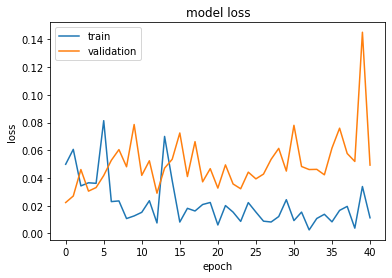

In [8]:
# Training history Statistics

print(history.history.keys())

# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Save

In [9]:
# Save model
model.save('classify3B.h5') 

import h5py
# save history
h = h5py.File('../history/c_his_3B.h5')
d = history.history
for k, v in d.items():
    h.create_dataset(k, data=np.array(v, dtype=np.float32))

# Analysis

In [6]:
# Check model performance accuracy before
model = load_model('classify3B.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


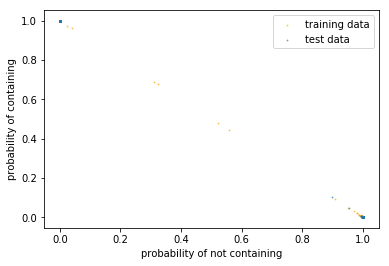

In [7]:
result_test = model.predict(X_test)
neg1 = result_test[0:,0] #first column
pos1 = result_test[0:,1] #second column

result_train = model.predict(X_train)
neg2 = result_train[0:,0] #first column
pos2 = result_train[0:,1] #second column

plt.scatter(neg2, pos2, s=1, color = 'orange',alpha=0.5, label = 'training data')
plt.scatter(neg1, pos1, s=1, alpha=0.5, label = 'test data')

plt.xlabel("probability of not containing")
plt.ylabel("probability of containing")
plt.legend(loc='upper right')
plt.show()

# LOOK INTO TEST SET

In [8]:
import sys
sys.path.insert(0, '../functions')
from ipynb.fs.full.generate_data import convert, visualize

import pylab

PyCBC.libutils: pkg-config call failed, setting NO_PKGCONFIG=1


  0%|          | 0/1800 [00:00<?, ?it/s]

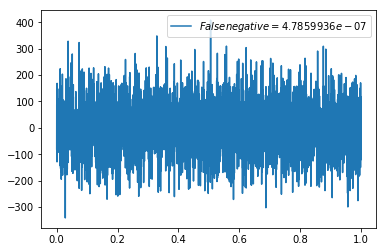

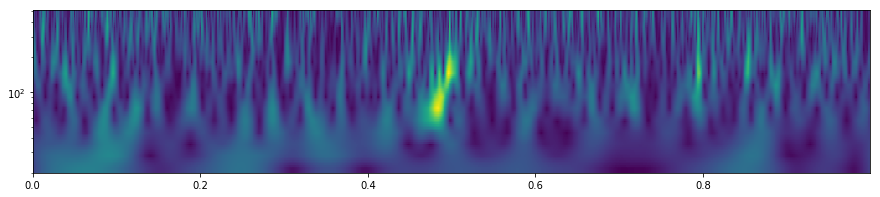

 15%|█▍        | 266/1800 [00:02<00:16, 90.64it/s]

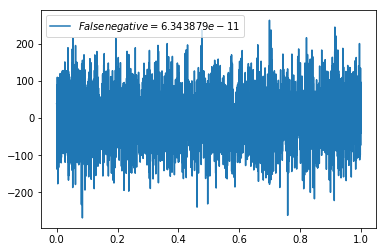

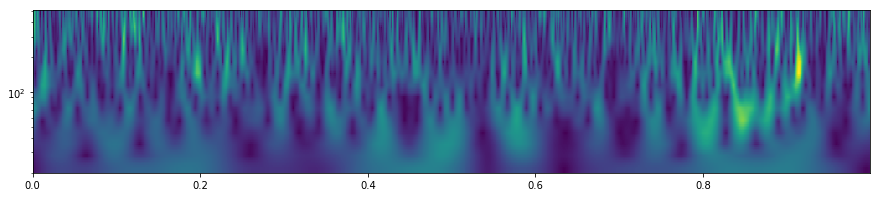

 69%|██████▊   | 1235/1800 [00:04<00:04, 119.74it/s]

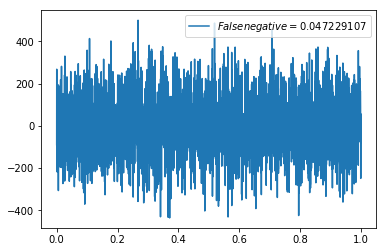

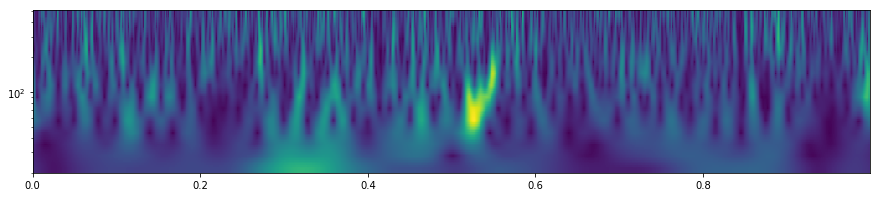

  0%|          | 0/1800 [00:00<?, ?it/s]

False negative:  3


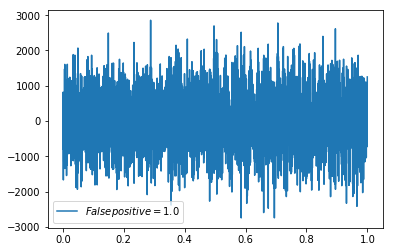

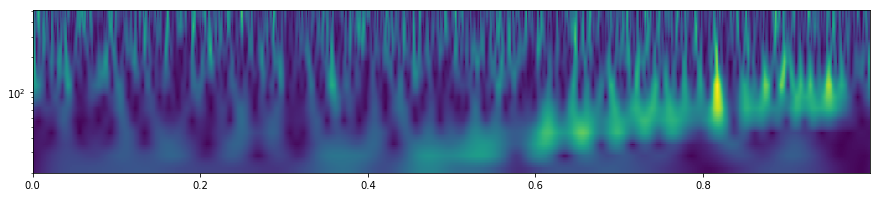

100%|██████████| 1800/1800 [00:02<00:00, 825.84it/s]

False positive:  1


In [9]:
# find wrong predictions in test set

false_negative = 0
for i in tqdm(range(len(pos1))):
    if pos1[i] < 0.5 and ytest[i][0]==1:
        false_negative += 1
        falneg_wf = convert(Xtest[i])
        pylab.plot(falneg_wf.sample_times, falneg_wf, 
                   label = '$False negative = %s$'%pos1[i])
        pylab.legend()
        pylab.show()
        visualize(falneg_wf)
        
print("False negative: ", false_negative)


false_positive = 0
for i in tqdm(range(len(pos1))):
    if pos1[i] > 0.5 and ytest[i][0]==0:
        false_positive += 1
        falpos_wf = convert(Xtest[i])
        pylab.plot(falpos_wf.sample_times, falpos_wf, 
                   label = '$False positive = %s$'%pos1[i])
        pylab.legend()
        pylab.show()
        visualize(falpos_wf)
        
print("False positive: ", false_positive)

In [10]:
# find the ones that the model is unsure of

uncertain_count = 0
for i in tqdm(range(len(pos1))):
    if pos1[i] > 0.4 and pos1[i] < 0.6:
        uncertain_count += 1
        unsure_wf = convert(Xtest[i])
        pylab.plot(unsure_wf.sample_times, unsure_wf, 
                   label = 'likely to be '+'$gw=%s$'%pos1[i] + ' actually '+ str(ytest[i]))
        pylab.legend()
        pylab.show()
        visualize(unsure_wf)

print("uncertained: ", uncertain_count)

100%|██████████| 1800/1800 [00:00<00:00, 163655.32it/s]

uncertained:  0


# LOOK INTO TRAINING SET

  0%|          | 0/16197 [00:00<?, ?it/s]

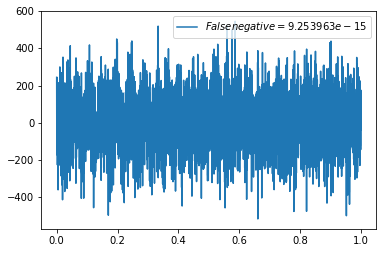

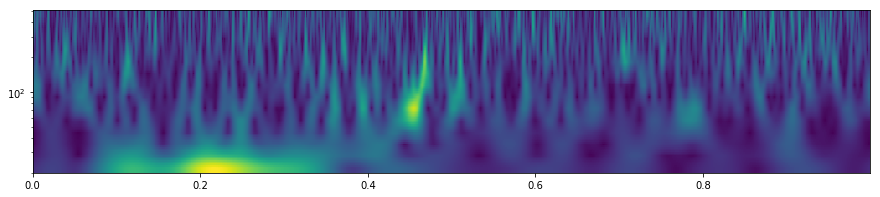

 12%|█▏        | 1933/16197 [00:02<00:15, 896.47it/s]

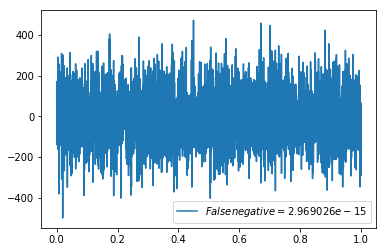

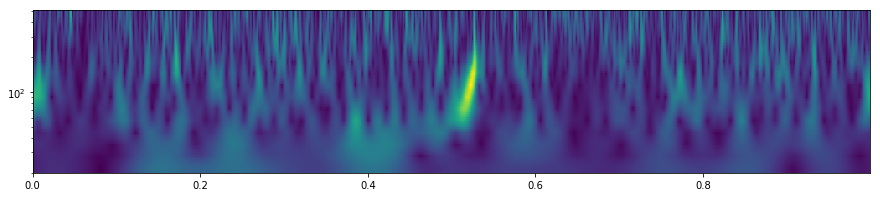

 70%|██████▉   | 11297/16197 [00:03<00:04, 1196.55it/s]

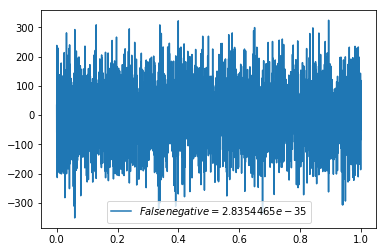

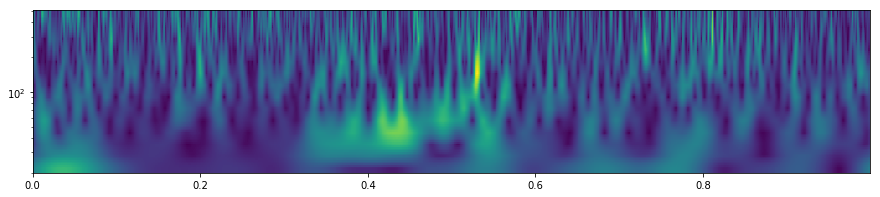

 85%|████████▍ | 13688/16197 [00:05<00:02, 1233.12it/s]

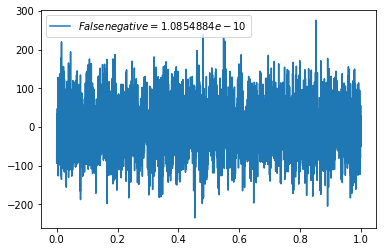

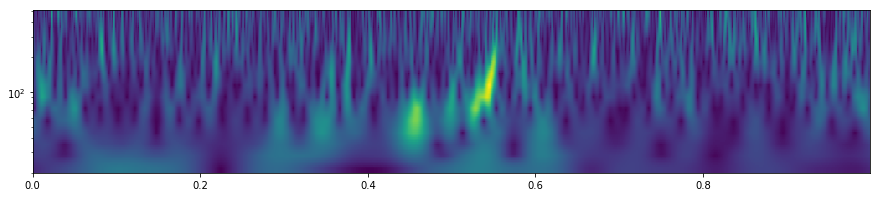

 87%|████████▋ | 14062/16197 [00:07<00:04, 507.28it/s] 

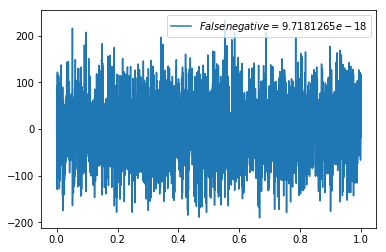

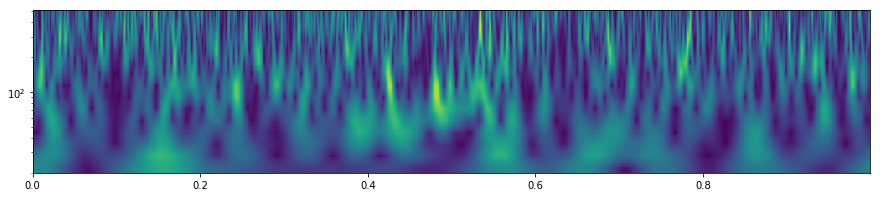

 89%|████████▉ | 14450/16197 [00:10<00:05, 295.71it/s]

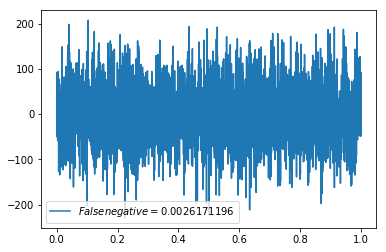

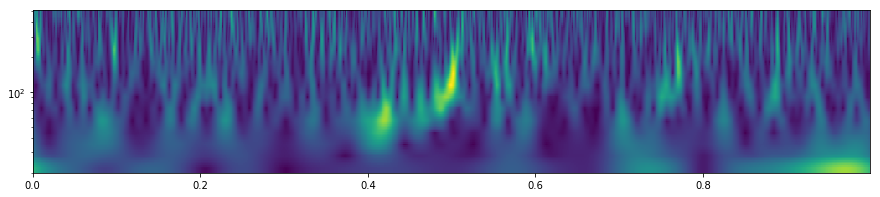

 92%|█████████▏| 14887/16197 [00:11<00:04, 296.11it/s]

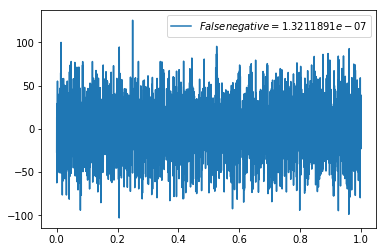

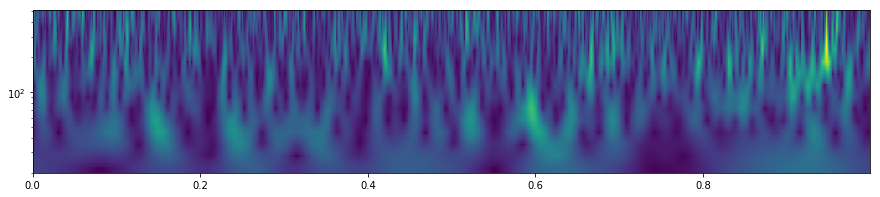

 94%|█████████▍| 15266/16197 [00:12<00:03, 292.80it/s]

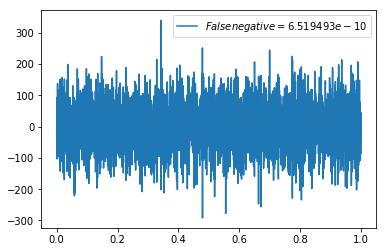

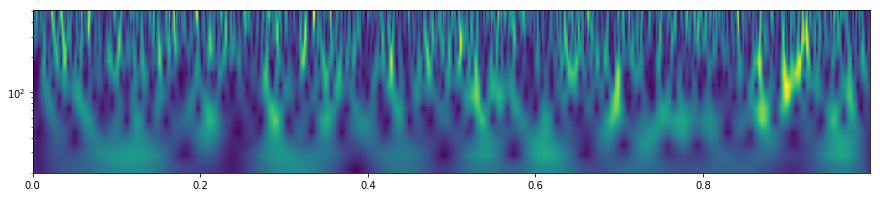

 95%|█████████▍| 15326/16197 [00:14<00:08, 101.30it/s]

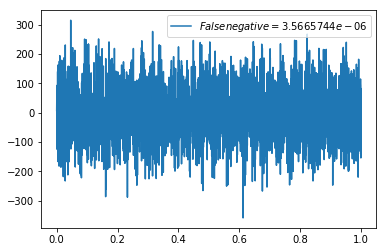

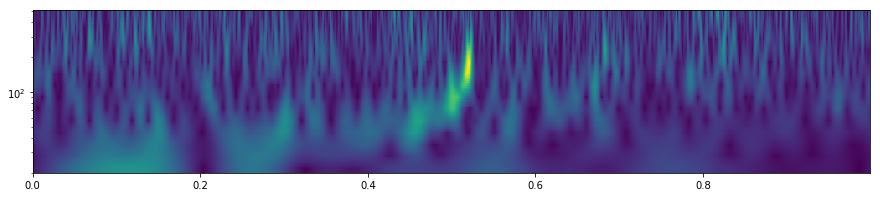

  0%|          | 0/16197 [00:00<?, ?it/s]

False negative:  9


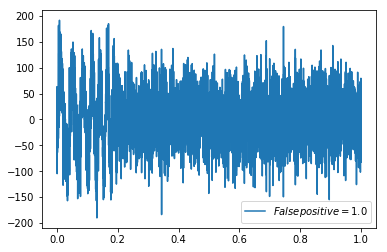

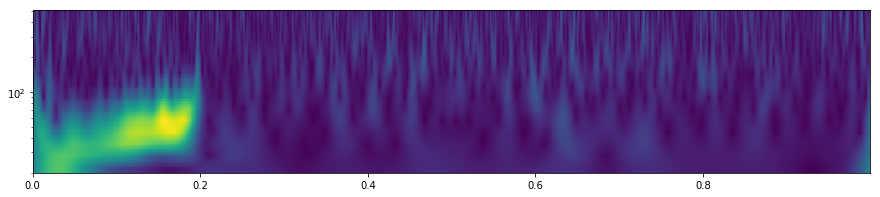

 40%|████      | 6487/16197 [00:01<00:02, 4253.56it/s]

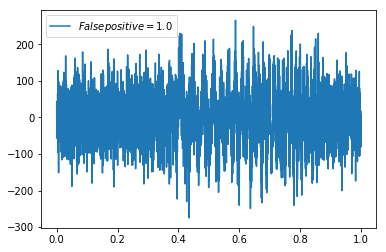

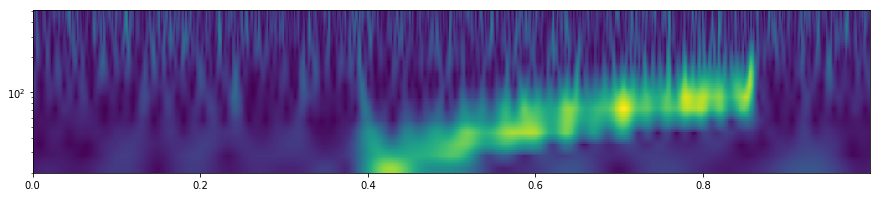

 42%|████▏     | 6828/16197 [00:03<00:14, 639.67it/s] 

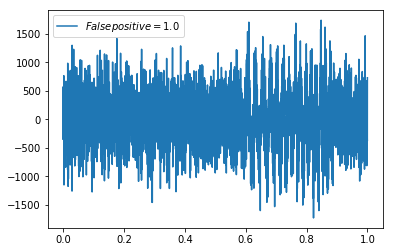

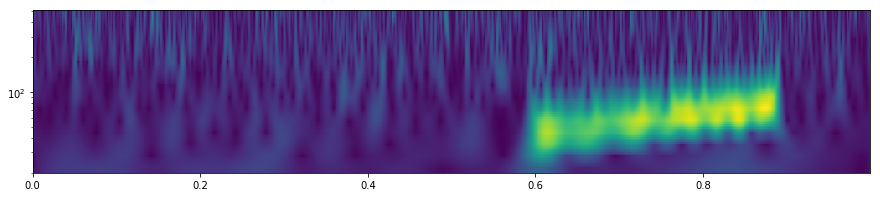

 54%|█████▍    | 8722/16197 [00:04<00:10, 722.22it/s]

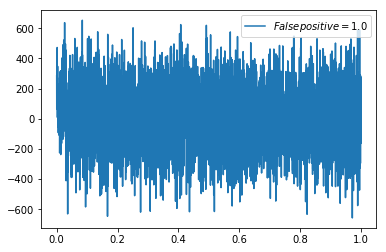

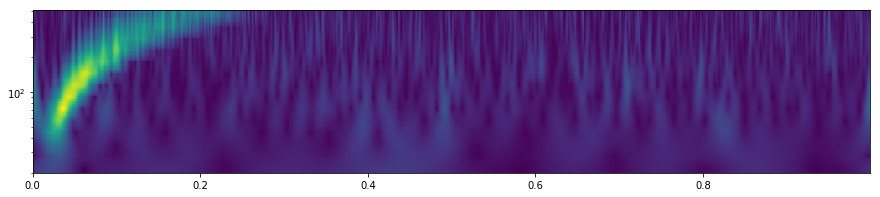

 72%|███████▏  | 11626/16197 [00:07<00:05, 844.48it/s]

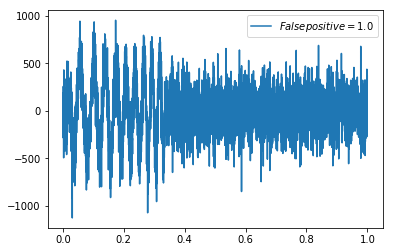

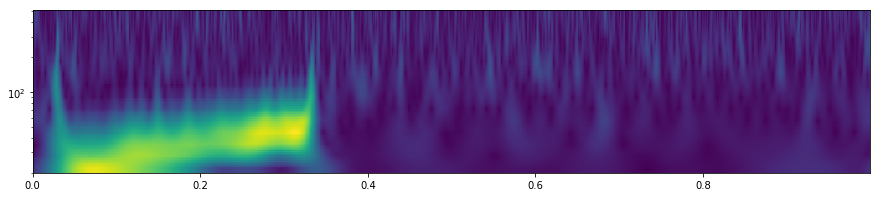

 87%|████████▋ | 14148/16197 [00:09<00:02, 911.30it/s]

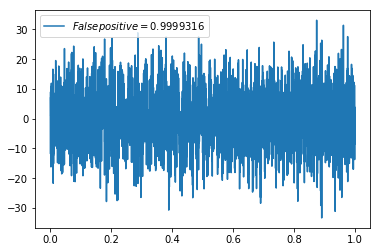

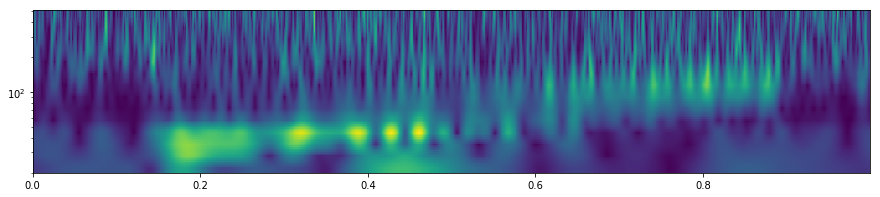

 92%|█████████▏| 14960/16197 [00:11<00:01, 691.01it/s]

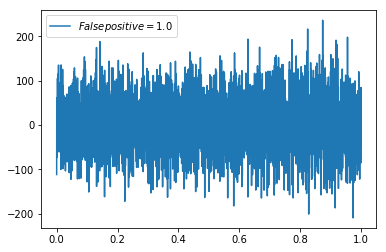

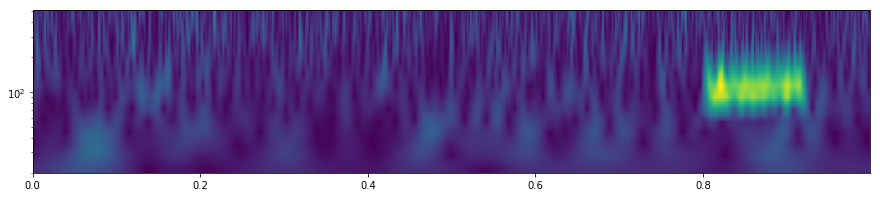

 93%|█████████▎| 15133/16197 [00:12<00:04, 247.98it/s]

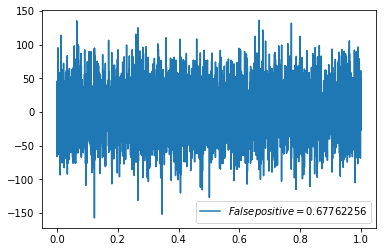

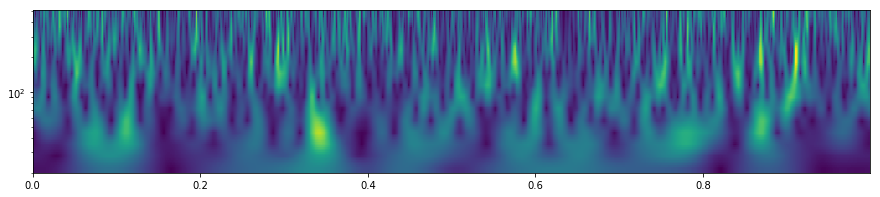

 97%|█████████▋| 15705/16197 [00:14<00:01, 253.95it/s]

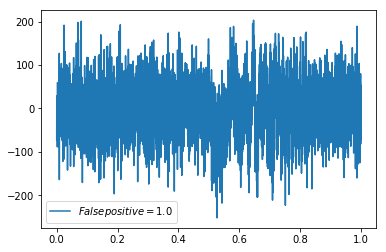

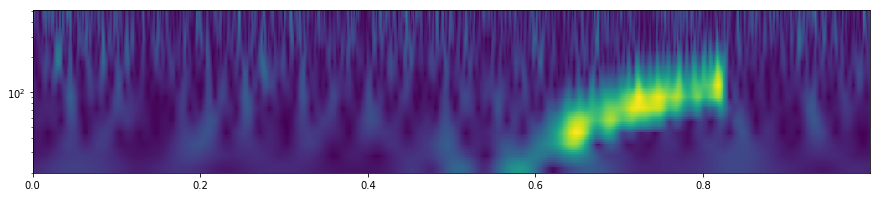

100%|██████████| 16197/16197 [00:16<00:00, 978.77it/s]

False positive:  9


In [11]:
# find wrong predictions in training set

false_negative_train = 0
for i in tqdm(range(len(pos2))):
    if pos2[i] < 0.5 and ytrain[i][0]==1:
        false_negative_train += 1
        falneg_wf = convert(Xtrain[i])
        pylab.plot(falneg_wf.sample_times, falneg_wf, 
                   label = '$False negative = %s$'%pos2[i])
        pylab.legend()
        pylab.show()
        visualize(falneg_wf)
        
        
print("False negative: ", false_negative_train)


false_positive_train = 0
for i in tqdm(range(len(pos2))):
    if pos2[i] > 0.5 and ytrain[i][0]==0:
        false_positive_train += 1
        falpos_wf = convert(Xtrain[i])
        pylab.plot(falpos_wf.sample_times, falpos_wf, 
                   label = '$False positive = %s$'%pos2[i])
        pylab.legend()
        pylab.show()
        visualize(falpos_wf)
        
print("False positive: ", false_positive_train)

  0%|          | 0/16197 [00:00<?, ?it/s]

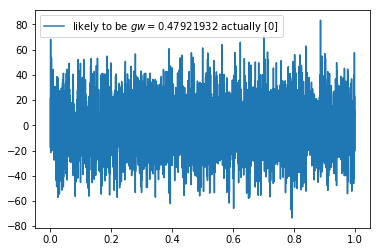

 86%|████████▋ | 13999/16197 [00:00<00:00, 18910.30it/s]

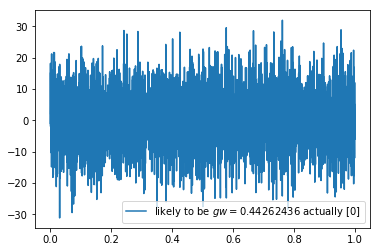

100%|██████████| 16197/16197 [00:01<00:00, 12001.77it/s]

uncertained:  2


In [12]:
# find the ones that the model is unsure of

uncertain_count_train = 0
for i in tqdm(range(len(pos2))):
    if pos2[i] > 0.4 and pos2[i] < 0.6:
        uncertain_count_train += 1
        unsure_wf = convert(Xtrain[i])
        pylab.plot(unsure_wf.sample_times, unsure_wf, 
                   label = 'likely to be '+'$gw=%s$'%pos2[i] + ' actually '+ str(ytrain[i]))
        pylab.legend()
        pylab.show()

print("uncertained: ", uncertain_count_train)

In [14]:
print(type(Xtrain))

<class 'numpy.ndarray'>
